# Data analysis: UK-Car Price Prediction

## 1. Import necessary library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import pandas as pd
import os

In [2]:
INPUT_DIR = 'unclean_data/'
unclean_data = [os.path.join(INPUT_DIR, f'{x}') for x in os.listdir(INPUT_DIR)]

In [3]:
unclean_data = unclean_data[1:]

In [4]:
unclean_data

['unclean_data/audi.csv',
 'unclean_data/bmw.csv',
 'unclean_data/fiat.csv',
 'unclean_data/ford.csv',
 'unclean_data/jaguar.csv',
 'unclean_data/kia.csv',
 'unclean_data/land-rover.csv',
 'unclean_data/mercedes-benz.csv',
 'unclean_data/mini.csv',
 'unclean_data/nissan.csv',
 'unclean_data/peugeot.csv',
 'unclean_data/skoda.csv',
 'unclean_data/toyota.csv',
 'unclean_data/vauxhall.csv',
 'unclean_data/volkswagen.csv']

## 2. Clean data

### 2.1. Remove unnecessary attribute

***Các thuộc tính của xe:***

- **Model**: mẫu xe ô tô *(mẫu ô tô là tên hoặc số mà nhà sản xuất sử dụng để xác định và tiếp thị một loạt các loại ô tô tương tự)*
- **Fuel Type**: nhiên liệu động cơ sử dụng *(Một nhiên liệu động cơ là một nhiên liệu được sử dụng để cung cấp năng lượng cho động cơ trong xe có động cơ)*
- **Engine Size**: kích thước động cơ *(Kích thước động cơ là thể tích nhiên liệu và không khí có thể được đẩy qua xi-lanh của ô tô và được tính bằng đơn vị phân khối (cc). Kích thước động cơ ô tô thường được quy định bằng lít)*
- **Transmission**: hộp số ô tô *(Hộp số ô tô là một trong những thành phần quan trọng nhất của xe. Đó là thứ chuyển sức mạnh từ động cơ đến các bánh xe. Có nhiều loại hộp số ô tô. Một số là số tự động, trong khi hộp số tay ở xe côn tay yêu cầu người lái phải hoàn thành thêm các bước để xe vận hành hiệu quả.)*
- **Mileage**: số dặm *(số dặm hoặc quãng đường trung bình mà một chiếc xe có thể đi được với một lượng nhiên liệu nhất định)*
- **Door**: số cửa của ô tô
- **BHP**: brake horsepower - mã lực phanh *(mã lực phanh' (bhp) được sử dụng làm phép đo chính xác về công suất động cơ.)*
- **Year**: năm xe được tung ra thị trường
- **MPG**: MPG=Mileage/gallon *(Mpg là viết tắt của dặm trên mỗi gallon, và được sử dụng để cho biết xe của bạn có thể đi được bao xa cho mỗi gallon (hoặc 4,55 lít) nhiên liệu mà nó sử dụng)*
- **Body Type**: phong cách thân xe *(Có nhiều loại kiểu dáng của xe. Chúng khác nhau tùy thuộc vào mục đích sử dụng, vị trí thị trường, vị trí và thời đại chúng được sản xuất.)*
- **CO2**: lượng CO2 mà ô tô thải ra ngoài môi trường với mỗi km ô tô đi được *(g/km)*
- **Colour**: màu xe
- **Price**: giá xe ô tô

In [5]:
audi = pd.read_csv('unclean_data/audi.csv')
audi.head()

Unnamed: 0 Model Fuel Type Engine Size Transmission       Mileage  Doors  \
0           0    Q8    Diesel        3.0L    Automatic   9,680 miles    5.0   
1           1    Q8    Diesel        3.0L    Automatic  21,906 miles    5.0   
2           2    Q7    Diesel        3.0L    Automatic  11,982 miles    5.0   
3           3    Q7    Diesel        3.0L    Automatic  14,045 miles    5.0   
4           4    Q5    Petrol        2.0L    Automatic  25,232 miles    5.0   

       BHP       Year   MPG Body Type       CO2                 Colour  \
0  282 bhp  2019 (69)  33.6    Estate  178 g/km                  BLACK   
1  282 bhp  2019 (69)  33.6    Estate  178 g/km                   BLUE   
2  282 bhp  2019 (69)  33.2    Estate  177 g/km  Samurai grey metallic   
3  282 bhp  2019 (69)  33.2    Estate  177 g/km           DAYTONA GREY   
4  248 bhp  2018 (68)  40.4    Estate  159 g/km          GLACIER WHITE   

   Previous Keepers Ultra Low Emission Zone     Tax    Price MOT Expires  \
0               1.0                    Euro 6  £199  £51,500         NaN   
1               1.0                    Euro 6  £199  £49,250         NaN   
2               1.0                    Euro 6  £199  £49,000         NaN   
3               1.0                    Euro 6  £199  £48,500         NaN   
4               1.0                    Euro 6  £199  £34,000  12-10-2022   

  Interior Trim Euro Status  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

In [6]:
cleaning_audi = pd.DataFrame(audi[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [7]:
cleaning_audi.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0    Q8    Diesel        3.0L    Automatic   9,680 miles    5.0  282 bhp   
1    Q8    Diesel        3.0L    Automatic  21,906 miles    5.0  282 bhp   
2    Q7    Diesel        3.0L    Automatic  11,982 miles    5.0  282 bhp   
3    Q7    Diesel        3.0L    Automatic  14,045 miles    5.0  282 bhp   
4    Q5    Petrol        2.0L    Automatic  25,232 miles    5.0  248 bhp   

        Year   MPG Body Type       CO2                 Colour    Price  
0  2019 (69)  33.6    Estate  178 g/km                  BLACK  £51,500  
1  2019 (69)  33.6    Estate  178 g/km                   BLUE  £49,250  
2  2019 (69)  33.2    Estate  177 g/km  Samurai grey metallic  £49,000  
3  2019 (69)  33.2    Estate  177 g/km           DAYTONA GREY  £48,500  
4  2018 (68)  40.4    Estate  159 g/km          GLACIER WHITE  £34,000

In [8]:
bmw = pd.read_csv('unclean_data/bmw.csv')
audi.head()

Unnamed: 0 Model Fuel Type Engine Size Transmission       Mileage  Doors  \
0           0    Q8    Diesel        3.0L    Automatic   9,680 miles    5.0   
1           1    Q8    Diesel        3.0L    Automatic  21,906 miles    5.0   
2           2    Q7    Diesel        3.0L    Automatic  11,982 miles    5.0   
3           3    Q7    Diesel        3.0L    Automatic  14,045 miles    5.0   
4           4    Q5    Petrol        2.0L    Automatic  25,232 miles    5.0   

       BHP       Year   MPG Body Type       CO2                 Colour  \
0  282 bhp  2019 (69)  33.6    Estate  178 g/km                  BLACK   
1  282 bhp  2019 (69)  33.6    Estate  178 g/km                   BLUE   
2  282 bhp  2019 (69)  33.2    Estate  177 g/km  Samurai grey metallic   
3  282 bhp  2019 (69)  33.2    Estate  177 g/km           DAYTONA GREY   
4  248 bhp  2018 (68)  40.4    Estate  159 g/km          GLACIER WHITE   

   Previous Keepers Ultra Low Emission Zone     Tax    Price MOT Expires  \
0               1.0                    Euro 6  £199  £51,500         NaN   
1               1.0                    Euro 6  £199  £49,250         NaN   
2               1.0                    Euro 6  £199  £49,000         NaN   
3               1.0                    Euro 6  £199  £48,500         NaN   
4               1.0                    Euro 6  £199  £34,000  12-10-2022   

  Interior Trim Euro Status  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

In [9]:
cleaning_bmw = pd.DataFrame(bmw[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [10]:
cleaning_bmw.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0  8 Series    Petrol        3.0L    Automatic     933 miles      2  335 bhp   
1        M2    Petrol        3.0L    Automatic  18,161 miles      2  405 bhp   
2  5 Series    Petrol        3.0L    Automatic  35,578 miles      5  335 bhp   
3        X5    Diesel        3.0L    Automatic  54,064 miles      5  308 bhp   
4        X5    Diesel        3.0L    Automatic  34,681 miles      5  308 bhp   

        Year   MPG Body Type       CO2                    Colour    Price  
0  2021 (21)  33.6     Coupe       NaN                     WHITE  £54,500  
1  2019 (69)  29.1     Coupe  209 g/km  Long Beach Blue metallic  £40,100  
2  2018 (68)  37.7    Estate  172 g/km    Sophisto Grey Xirallic  £37,100  
3  2017 (67)  47.1    Estate  159 g/km                     WHITE  £36,900  
4  2017 (17)  47.1    Estate  159 g/km                     BLACK  £35,800

In [11]:
fiat = pd.read_csv('unclean_data/fiat.csv')
fiat.head()

Unnamed: 0       Model Fuel Type Engine Size Transmission       Mileage  \
0           0  124 Spider    Petrol        1.4L       Manual  14,497 miles   
1           1        500X    Petrol        1.0L       Manual  14,687 miles   
2           2        500X    Petrol        1.4L    Automatic  19,038 miles   
3           3         500    Petrol        1.2L    Automatic   9,231 miles   
4           4         500    Petrol        1.2L    Automatic   9,210 miles   

   Doors      BHP       Year   MPG    Body Type       CO2 Colour MOT Expires  \
0      2  138 bhp  2018 (18)  44.1  Convertible  148 g/km  BLACK  22-02-2022   
1      5  118 bhp  2019 (68)  41.5    Hatchback  132 g/km  GREEN         NaN   
2      5  140 bhp  2017 (67)  49.6    Hatchback  133 g/km  BLACK         NaN   
3      3   68 bhp  2020 (20)  46.3    Hatchback  114 g/km  WHITE         NaN   
4      3   68 bhp  2019 (69)  46.3    Hatchback  114 g/km  GREEN         NaN   

  Ultra Low Emission Zone     Tax    Price  Previous Keepers  
0                    Euro 6  £199  £17,000               NaN  
1                    Euro 6  £199  £15,200               NaN  
2                    Euro 6  £199  £14,100               1.0  
3                    Euro 6  £199  £13,800               1.0  
4                    Euro 6  £199  £13,500               1.0

In [12]:
cleaning_fiat = pd.DataFrame(fiat[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [13]:
cleaning_fiat.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors  \
0  124 Spider    Petrol        1.4L       Manual  14,497 miles      2   
1        500X    Petrol        1.0L       Manual  14,687 miles      5   
2        500X    Petrol        1.4L    Automatic  19,038 miles      5   
3         500    Petrol        1.2L    Automatic   9,231 miles      3   
4         500    Petrol        1.2L    Automatic   9,210 miles      3   

       BHP       Year   MPG    Body Type       CO2 Colour    Price  
0  138 bhp  2018 (18)  44.1  Convertible  148 g/km  BLACK  £17,000  
1  118 bhp  2019 (68)  41.5    Hatchback  132 g/km  GREEN  £15,200  
2  140 bhp  2017 (67)  49.6    Hatchback  133 g/km  BLACK  £14,100  
3   68 bhp  2020 (20)  46.3    Hatchback  114 g/km  WHITE  £13,800  
4   68 bhp  2019 (69)  46.3    Hatchback  114 g/km  GREEN  £13,500

In [14]:
ford = pd.read_csv('unclean_data/ford.csv')
ford.head()

Unnamed: 0  Model Fuel Type Engine Size Transmission       Mileage  Doors  \
0           0   Puma    Petrol        1.0L       Manual   3,053 miles      5   
1           1   Kuga    Diesel        2.0L       Manual  21,304 miles      5   
2           2   Puma    Petrol        1.0L       Manual  12,655 miles      5   
3           3   Kuga    Diesel        2.0L       Manual  34,250 miles      5   
4           4  Focus    Petrol        1.0L       Manual   3,848 miles      5   

       BHP       Year   MPG  Body Type       CO2            Colour  \
0  123 bhp  2020 (20)  50.4  Hatchback   99 g/km             BLACK   
1  148 bhp  2018 (68)  39.2  Hatchback  144 g/km              GREY   
2  123 bhp  2020 (69)  50.4  Hatchback   99 g/km              BLUE   
3  177 bhp  2018 (18)  54.3  Hatchback  135 g/km  DEEP IMPACT BLUE   
4  123 bhp  2020 (20)  45.6  Hatchback  110 g/km      FROZEN WHITE   

   Previous Keepers Ultra Low Emission Zone     Tax    Price MOT Expires  \
0               1.0                    Euro 6  £199  £23,800         NaN   
1               1.0                    Euro 6  £199  £22,400  08-11-2022   
2               1.0                    Euro 6  £199  £22,400         NaN   
3               1.0                    Euro 6  £199  £22,000  25-03-2022   
4               1.0                    Euro 6  £199  £21,500         NaN   

  Interior Trim Euro Status  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

In [15]:
cleaning_ford = pd.DataFrame(ford[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [16]:
cleaning_ford.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0   Puma    Petrol        1.0L       Manual   3,053 miles      5  123 bhp   
1   Kuga    Diesel        2.0L       Manual  21,304 miles      5  148 bhp   
2   Puma    Petrol        1.0L       Manual  12,655 miles      5  123 bhp   
3   Kuga    Diesel        2.0L       Manual  34,250 miles      5  177 bhp   
4  Focus    Petrol        1.0L       Manual   3,848 miles      5  123 bhp   

        Year   MPG  Body Type       CO2            Colour    Price  
0  2020 (20)  50.4  Hatchback   99 g/km             BLACK  £23,800  
1  2018 (68)  39.2  Hatchback  144 g/km              GREY  £22,400  
2  2020 (69)  50.4  Hatchback   99 g/km              BLUE  £22,400  
3  2018 (18)  54.3  Hatchback  135 g/km  DEEP IMPACT BLUE  £22,000  
4  2020 (20)  45.6  Hatchback  110 g/km      FROZEN WHITE  £21,500

In [17]:
jaguar = pd.read_csv('unclean_data/jaguar.csv')
jaguar.head()

Unnamed: 0   Model Fuel Type Transmission       Mileage  Doors      BHP  \
0           0  I-Pace  Electric    Automatic   3,816 miles      5  394 bhp   
1           1  I-Pace  Electric    Automatic   4,654 miles      5  394 bhp   
2           2  F-Pace    Petrol    Automatic  30,447 miles      5  296 bhp   
3           3  F-Pace    Diesel    Automatic  64,719 miles      5  296 bhp   
4           4  F-Pace    Diesel    Automatic  25,984 miles      5  178 bhp   

        Year  Body Type Colour  Previous Keepers Ultra Low Emission Zone    \
0  2021 (21)  Hatchback  BLACK               1.0                    Euro 6   
1  2020 (20)  Hatchback   BLUE               1.0                    Euro 6   
2  2018 (68)     Estate    RED               1.0                    Euro 6   
3  2016 (16)     Estate  BLACK               NaN                    Euro 6   
4  2019 (69)     Estate   GREY               1.0                    Euro 6   

    Tax    Price   MPG Engine Size       CO2 MOT Expires Euro Status  
0  £199  £61,300   NaN         NaN       NaN         NaN         NaN  
1  £199  £53,400   1.0         NaN       NaN         NaN         NaN  
2  £199  £36,500  28.0        2.0L  185 g/km  20-09-2022         NaN  
3  £199  £34,100  47.1        3.0L  159 g/km  29-06-2022         NaN  
4  £199  £34,000  42.2        2.0L  151 g/km         NaN         NaN

In [18]:
cleaning_jaguar = pd.DataFrame(jaguar[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [19]:
cleaning_jaguar.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0  I-Pace  Electric         NaN    Automatic   3,816 miles      5  394 bhp   
1  I-Pace  Electric         NaN    Automatic   4,654 miles      5  394 bhp   
2  F-Pace    Petrol        2.0L    Automatic  30,447 miles      5  296 bhp   
3  F-Pace    Diesel        3.0L    Automatic  64,719 miles      5  296 bhp   
4  F-Pace    Diesel        2.0L    Automatic  25,984 miles      5  178 bhp   

        Year   MPG  Body Type       CO2 Colour    Price  
0  2021 (21)   NaN  Hatchback       NaN  BLACK  £61,300  
1  2020 (20)   1.0  Hatchback       NaN   BLUE  £53,400  
2  2018 (68)  28.0     Estate  185 g/km    RED  £36,500  
3  2016 (16)  47.1     Estate  159 g/km  BLACK  £34,100  
4  2019 (69)  42.2     Estate  151 g/km   GREY  £34,000

In [20]:
kia = pd.read_csv('unclean_data/kia.csv')
kia.head()

Unnamed: 0     Model      Fuel Type Engine Size Transmission       Mileage  \
0           0   Sorento         Diesel        2.2L    Automatic  42,453 miles   
1           1  Sportage         Diesel        1.6L       Manual  21,148 miles   
2           2  Sportage         Diesel        1.6L    Automatic  55,415 miles   
3           3      Niro  Hybrid Petrol        1.6L    Automatic  21,800 miles   
4           4  Sportage         Diesel        1.7L    Automatic  17,425 miles   

   Doors      BHP       Year   MPG Body Type       CO2 Colour  \
0      5  197 bhp  2019 (19)  38.2    Estate  161 g/km   GREY   
1      5  134 bhp  2018 (68)  44.1    Estate  135 g/km  WHITE   
2      5  134 bhp  2018 (68)  44.8    Estate  128 g/km   GREY   
3      5  139 bhp  2018 (68)  54.3    Estate   29 g/km  WHITE   
4      5  139 bhp  2017 (67)  57.7    Estate  129 g/km  WHITE   

   Previous Keepers Ultra Low Emission Zone     Tax    Price MOT Expires  
0               1.0                    Euro 6  £199  £29,000         NaN  
1               1.0                    Euro 6  £199  £23,000         NaN  
2               1.0                    Euro 6  £199  £22,400  28-09-2022  
3               1.0                    Euro 6  £199  £21,900         NaN  
4               1.0                    Euro 6  £199  £21,600         NaN

In [21]:
cleaning_kia = pd.DataFrame(kia[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [22]:
cleaning_kia.head()

Model      Fuel Type Engine Size Transmission       Mileage  Doors  \
0   Sorento         Diesel        2.2L    Automatic  42,453 miles      5   
1  Sportage         Diesel        1.6L       Manual  21,148 miles      5   
2  Sportage         Diesel        1.6L    Automatic  55,415 miles      5   
3      Niro  Hybrid Petrol        1.6L    Automatic  21,800 miles      5   
4  Sportage         Diesel        1.7L    Automatic  17,425 miles      5   

       BHP       Year   MPG Body Type       CO2 Colour    Price  
0  197 bhp  2019 (19)  38.2    Estate  161 g/km   GREY  £29,000  
1  134 bhp  2018 (68)  44.1    Estate  135 g/km  WHITE  £23,000  
2  134 bhp  2018 (68)  44.8    Estate  128 g/km   GREY  £22,400  
3  139 bhp  2018 (68)  54.3    Estate   29 g/km  WHITE  £21,900  
4  139 bhp  2017 (67)  57.7    Estate  129 g/km  WHITE  £21,600

In [23]:
land_rover = pd.read_csv('unclean_data/land-rover.csv')
land_rover.head()

Unnamed: 0              Model      Fuel Type Engine Size Transmission  \
0           0  Range Rover Sport  Hybrid Petrol        2.0L    Automatic   
1           1  Range Rover Sport  Hybrid Petrol        2.0L    Automatic   
2           2          Discovery         Petrol        2.0L    Automatic   
3           3  Range Rover Velar         Diesel        2.0L    Automatic   
4           4  Range Rover Velar         Diesel        2.0L    Automatic   

        Mileage  Doors      BHP       Year    MPG Body Type       CO2  \
0  39,070 miles      5  398 bhp  2018 (18)  99.99    Estate   64 g/km   
1  33,372 miles      5  398 bhp  2019 (19)  85.60    Estate   71 g/km   
2  11,246 miles      5  296 bhp  2020 (69)  25.90    Estate  220 g/km   
3   9,827 miles      5  178 bhp  2019 (69)  42.20    Estate  157 g/km   
4  20,325 miles      5  178 bhp  2019 (69)  42.20    Estate  157 g/km   

                    Colour MOT Expires  Previous Keepers  \
0                   SILVER  15-07-2022               1.0   
1           Silicon Silver         NaN               1.0   
2                    BLACK         NaN               1.0   
3  Indus Silver - metallic         NaN               2.0   
4  Indus Silver - metallic         NaN               2.0   

  Ultra Low Emission Zone     Tax    Price  \
0                    Euro 6  £199  £64,000   
1                    Euro 6  £199  £62,000   
2                    Euro 6  £199  £57,500   
3                    Euro 6  £199  £49,500   
4                    Euro 6  £199  £46,500   

                                       Interior Trim Euro Status  
0                                                NaN         NaN  
1  Ebony/Eclipse duo tone perforated Windsor Leather         NaN  
2                                                NaN         NaN  
3                                                NaN         NaN  
4                                                NaN         NaN

In [24]:
cleaning_land_rover = pd.DataFrame(land_rover[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [25]:
cleaning_land_rover.head()

Model      Fuel Type Engine Size Transmission       Mileage  \
0  Range Rover Sport  Hybrid Petrol        2.0L    Automatic  39,070 miles   
1  Range Rover Sport  Hybrid Petrol        2.0L    Automatic  33,372 miles   
2          Discovery         Petrol        2.0L    Automatic  11,246 miles   
3  Range Rover Velar         Diesel        2.0L    Automatic   9,827 miles   
4  Range Rover Velar         Diesel        2.0L    Automatic  20,325 miles   

   Doors      BHP       Year    MPG Body Type       CO2  \
0      5  398 bhp  2018 (18)  99.99    Estate   64 g/km   
1      5  398 bhp  2019 (19)  85.60    Estate   71 g/km   
2      5  296 bhp  2020 (69)  25.90    Estate  220 g/km   
3      5  178 bhp  2019 (69)  42.20    Estate  157 g/km   
4      5  178 bhp  2019 (69)  42.20    Estate  157 g/km   

                    Colour    Price  
0                   SILVER  £64,000  
1           Silicon Silver  £62,000  
2                    BLACK  £57,500  
3  Indus Silver - metallic  £49,500  
4  Indus Silver - metallic  £46,500

In [26]:
mercedes_benz = pd.read_csv('unclean_data/mercedes-benz.csv')
mercedes_benz.head()

Unnamed: 0    Model Fuel Type Engine Size Transmission       Mileage  \
0           0      GLC    Diesel        2.0L    Automatic  13,616 miles   
1           1  E Class    Diesel        2.0L    Automatic   7,725 miles   
2           2  E Class    Diesel        2.9L    Automatic  15,244 miles   
3           3  E Class    Petrol        2.0L    Automatic  17,292 miles   
4           4      GLC    Diesel        2.0L    Automatic  10,821 miles   

   Doors      BHP       Year   MPG Body Type       CO2 Colour  \
0      5  241 bhp  2019 (69)  40.9    Estate  124 g/km  BLACK   
1      2  191 bhp  2020 (70)  70.6     Coupe  106 g/km  BLACK   
2      4  335 bhp  2019 (19)  48.7    Saloon  154 g/km   GREY   
3      2  241 bhp  2019 (19)  40.4     Coupe  160 g/km  BLACK   
4      5  191 bhp  2019 (69)  44.8    Estate  124 g/km   BLUE   

   Previous Keepers Ultra Low Emission Zone     Tax    Price MOT Expires  \
0               1.0                    Euro 6  £199  £41,200         NaN   
1               1.0                    Euro 6  £199  £37,500         NaN   
2               1.0                    Euro 6  £199  £36,000         NaN   
3               1.0                    Euro 6  £199  £35,500         NaN   
4               1.0                    Euro 6  £199  £35,500         NaN   

  Euro Status  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [27]:
cleaning_mercedes_benz = pd.DataFrame(mercedes_benz[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [28]:
cleaning_mercedes_benz.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0      GLC    Diesel        2.0L    Automatic  13,616 miles      5  241 bhp   
1  E Class    Diesel        2.0L    Automatic   7,725 miles      2  191 bhp   
2  E Class    Diesel        2.9L    Automatic  15,244 miles      4  335 bhp   
3  E Class    Petrol        2.0L    Automatic  17,292 miles      2  241 bhp   
4      GLC    Diesel        2.0L    Automatic  10,821 miles      5  191 bhp   

        Year   MPG Body Type       CO2 Colour    Price  
0  2019 (69)  40.9    Estate  124 g/km  BLACK  £41,200  
1  2020 (70)  70.6     Coupe  106 g/km  BLACK  £37,500  
2  2019 (19)  48.7    Saloon  154 g/km   GREY  £36,000  
3  2019 (19)  40.4     Coupe  160 g/km  BLACK  £35,500  
4  2019 (69)  44.8    Estate  124 g/km   BLUE  £35,500

In [29]:
mini = pd.read_csv('unclean_data/mini.csv')
mini.head()

Unnamed: 0        Model Fuel Type Engine Size Transmission       Mileage  \
0           0      Clubman    Petrol        2.0L    Automatic   5,983 miles   
1           1   Countryman    Petrol        1.5L    Automatic  16,561 miles   
2           2      Clubman    Petrol        2.0L    Automatic  20,183 miles   
3           3  Convertible    Petrol        1.5L       Manual  12,670 miles   
4           4    Hatchback    Petrol        1.5L    Automatic   3,356 miles   

   Doors      BHP       Year   MPG    Body Type       CO2     Colour  \
0      5  302 bhp  2020 (70)  34.9       Estate  169 g/km      WHITE   
1      5  134 bhp  2017 (67)  51.4    Hatchback  126 g/km       BLUE   
2      5  189 bhp  2019 (69)  42.2       Estate  127 g/km       GREY   
3      3  134 bhp  2020 (20)  44.8  Convertible  128 g/km      BLACK   
4      5  134 bhp  2020 (70)  47.1    Hatchback  119 g/km  CHILI RED   

   Previous Keepers Ultra Low Emission Zone     Tax    Price MOT Expires  \
0               1.0                    Euro 6  £199  £30,700         NaN   
1               NaN                    Euro 6  £199  £24,000  19-09-2022   
2               1.0                    Euro 6  £199  £23,900         NaN   
3               2.0                    Euro 6  £199  £23,600         NaN   
4               2.0                    Euro 6  £199  £23,500         NaN   

  Interior Trim  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [30]:
cleaning_mini = pd.DataFrame(mini[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [31]:
cleaning_mini.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors  \
0      Clubman    Petrol        2.0L    Automatic   5,983 miles      5   
1   Countryman    Petrol        1.5L    Automatic  16,561 miles      5   
2      Clubman    Petrol        2.0L    Automatic  20,183 miles      5   
3  Convertible    Petrol        1.5L       Manual  12,670 miles      3   
4    Hatchback    Petrol        1.5L    Automatic   3,356 miles      5   

       BHP       Year   MPG    Body Type       CO2     Colour    Price  
0  302 bhp  2020 (70)  34.9       Estate  169 g/km      WHITE  £30,700  
1  134 bhp  2017 (67)  51.4    Hatchback  126 g/km       BLUE  £24,000  
2  189 bhp  2019 (69)  42.2       Estate  127 g/km       GREY  £23,900  
3  134 bhp  2020 (20)  44.8  Convertible  128 g/km      BLACK  £23,600  
4  134 bhp  2020 (70)  47.1    Hatchback  119 g/km  CHILI RED  £23,500

In [32]:
nissan = pd.read_csv('unclean_data/nissan.csv')
nissan.head()

Unnamed: 0    Model Fuel Type Transmission       Mileage  Doors      BHP  \
0           0     LEAF  Electric    Automatic   7,176 miles      5  215 bhp   
1           1  X-Trail    Petrol       Manual   6,103 miles      5  163 bhp   
2           2  Qashqai    Petrol    Automatic   1,756 miles      5  158 bhp   
3           3  X-Trail    Diesel       Manual  38,891 miles      5  130 bhp   
4           4  X-Trail    Diesel       Manual   9,523 miles      5  130 bhp   

        Year   MPG  Body Type  Colour  Previous Keepers  \
0  2020 (69)   1.0  Hatchback   WHITE               1.0   
1  2018 (68)  44.1     Estate   BLACK               1.0   
2  2020 (20)  39.8  Hatchback    BLUE               1.0   
3  2018 (68)  55.4     Estate   BLACK               1.0   
4  2018 (18)  55.4     Estate  SILVER               1.0   

  Ultra Low Emission Zone     Tax    Price Engine Size       CO2 MOT Expires  \
0                    Euro 6  £199  £27,000         NaN       NaN         NaN   
1                    Euro 6  £199  £25,500        1.6L  149 g/km         NaN   
2                    Euro 6  £199  £23,400        1.3L  131 g/km         NaN   
3                    Euro 6  £199  £22,700        1.6L  133 g/km  10-08-2022   
4                    Euro 6  £199  £22,100        1.6L  133 g/km  06-06-2022   

  VAT Qualifying  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [33]:
cleaning_nissan = pd.DataFrame(nissan[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [34]:
cleaning_nissan.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0     LEAF  Electric         NaN    Automatic   7,176 miles      5  215 bhp   
1  X-Trail    Petrol        1.6L       Manual   6,103 miles      5  163 bhp   
2  Qashqai    Petrol        1.3L    Automatic   1,756 miles      5  158 bhp   
3  X-Trail    Diesel        1.6L       Manual  38,891 miles      5  130 bhp   
4  X-Trail    Diesel        1.6L       Manual   9,523 miles      5  130 bhp   

        Year   MPG  Body Type       CO2  Colour    Price  
0  2020 (69)   1.0  Hatchback       NaN   WHITE  £27,000  
1  2018 (68)  44.1     Estate  149 g/km   BLACK  £25,500  
2  2020 (20)  39.8  Hatchback  131 g/km    BLUE  £23,400  
3  2018 (68)  55.4     Estate  133 g/km   BLACK  £22,700  
4  2018 (18)  55.4     Estate  133 g/km  SILVER  £22,100

In [35]:
peugeot = pd.read_csv('unclean_data/peugeot.csv')
peugeot.head()

Unnamed: 0  Model Fuel Type Engine Size Transmission       Mileage  Doors  \
0           0   5008    Diesel        1.5L       Manual  37,613 miles      5   
1           1   5008    Diesel        1.5L       Manual  17,356 miles      5   
2           2   3008    Diesel        2.0L    Automatic  20,200 miles      5   
3           3   3008    Diesel        1.5L    Automatic  12,393 miles      5   
4           4   3008    Diesel        1.5L    Automatic   6,075 miles      5   

       BHP       Year   MPG  Body Type       CO2          Colour MOT Expires  \
0  129 bhp  2018 (18)  67.3        MPV  109 g/km           BLACK  19-05-2022   
1  129 bhp  2019 (19)  55.4        MPV  111 g/km  AMAZONITE GREY         NaN   
2  180 bhp  2017 (67)  58.9  Hatchback  124 g/km           BLACK  19-10-2022   
3  129 bhp  2018 (18)  68.9  Hatchback  108 g/km      NERA BLACK  08-08-2022   
4  129 bhp  2019 (69)  56.5  Hatchback  107 g/km            GREY         NaN   

   Previous Keepers Ultra Low Emission Zone     Tax    Price VAT Qualifying  
0               1.0                    Euro 6  £199  £27,000            NaN  
1               1.0                    Euro 6  £199  £26,700            NaN  
2               1.0                    Euro 6  £199  £24,800            NaN  
3               1.0                    Euro 6  £199  £24,000            NaN  
4               2.0                    Euro 6  £199  £22,200            NaN

In [36]:
cleaning_peugeot = pd.DataFrame(peugeot[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [37]:
cleaning_peugeot.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0   5008    Diesel        1.5L       Manual  37,613 miles      5  129 bhp   
1   5008    Diesel        1.5L       Manual  17,356 miles      5  129 bhp   
2   3008    Diesel        2.0L    Automatic  20,200 miles      5  180 bhp   
3   3008    Diesel        1.5L    Automatic  12,393 miles      5  129 bhp   
4   3008    Diesel        1.5L    Automatic   6,075 miles      5  129 bhp   

        Year   MPG  Body Type       CO2          Colour    Price  
0  2018 (18)  67.3        MPV  109 g/km           BLACK  £27,000  
1  2019 (19)  55.4        MPV  111 g/km  AMAZONITE GREY  £26,700  
2  2017 (67)  58.9  Hatchback  124 g/km           BLACK  £24,800  
3  2018 (18)  68.9  Hatchback  108 g/km      NERA BLACK  £24,000  
4  2019 (69)  56.5  Hatchback  107 g/km            GREY  £22,200

In [38]:
skoda = pd.read_csv('unclean_data/skoda.csv')
skoda.head()

Unnamed: 0    Model Fuel Type Engine Size Transmission       Mileage  \
0           0   Kodiaq    Diesel        2.0L       Manual  67,058 miles   
1           1    Karoq    Diesel        1.6L    Automatic  35,460 miles   
2           2   Superb    Diesel        2.0L    Automatic   4,707 miles   
3           3  Octavia    Diesel        2.0L       Manual  50,524 miles   
4           4    Karoq    Petrol        1.0L       Manual  24,018 miles   

   Doors      BHP       Year  Body Type       CO2                  Colour  \
0      5  148 bhp  2018 (67)     Estate  144 g/km  Business Grey metallic   
1      5  114 bhp  2018 (68)     Estate  125 g/km             PETROL BLUE   
2      5  188 bhp  2017 (66)  Hatchback  119 g/km  Business Grey Metallic   
3      5  181 bhp  2018 (18)     Estate  119 g/km                   GREEN   
4      5  114 bhp  2018 (18)     Estate  121 g/km              MOON WHITE   

  MOT Expires   MPG Ultra Low Emission Zone     Tax    Price  \
0  04-01-2022  51.4                    Euro 6  £199  £23,200   
1  25-07-2022  47.1                    Euro 6  £199  £21,100   
2  09-08-2022  61.4                    Euro 6  £199  £19,900   
3  16-07-2022  62.8                    Euro 6  £199  £19,500   
4  27-06-2022  52.3                    Euro 6  £199  £19,000   

   Previous Keepers Euro Status  
0               NaN         NaN  
1               1.0         NaN  
2               1.0         NaN  
3               1.0         NaN  
4               1.0         NaN

In [39]:
cleaning_skoda = pd.DataFrame(skoda[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [40]:
cleaning_skoda.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0   Kodiaq    Diesel        2.0L       Manual  67,058 miles      5  148 bhp   
1    Karoq    Diesel        1.6L    Automatic  35,460 miles      5  114 bhp   
2   Superb    Diesel        2.0L    Automatic   4,707 miles      5  188 bhp   
3  Octavia    Diesel        2.0L       Manual  50,524 miles      5  181 bhp   
4    Karoq    Petrol        1.0L       Manual  24,018 miles      5  114 bhp   

        Year   MPG  Body Type       CO2                  Colour    Price  
0  2018 (67)  51.4     Estate  144 g/km  Business Grey metallic  £23,200  
1  2018 (68)  47.1     Estate  125 g/km             PETROL BLUE  £21,100  
2  2017 (66)  61.4  Hatchback  119 g/km  Business Grey Metallic  £19,900  
3  2018 (18)  62.8     Estate  119 g/km                   GREEN  £19,500  
4  2018 (18)  52.3     Estate  121 g/km              MOON WHITE  £19,000

In [41]:
toyota = pd.read_csv('unclean_data/toyota.csv')
toyota.head()

Unnamed: 0 Model      Fuel Type Engine Size Transmission       Mileage  \
0           0  C-HR  Hybrid Petrol        2.0L    Automatic   9,226 miles   
1           1  Rav4  Hybrid Petrol        2.5L    Automatic  29,874 miles   
2           2  Rav4  Hybrid Petrol        2.5L    Automatic  60,607 miles   
3           3  C-HR  Hybrid Petrol        1.8L    Automatic  40,056 miles   
4           4  C-HR  Hybrid Petrol        1.8L    Automatic  34,475 miles   

   Doors      BHP       Year   MPG  Body Type       CO2  \
0      5  181 bhp  2020 (70)  53.3  Hatchback   92 g/km   
1      5      NaN  2018 (68)   NaN     Estate  127 g/km   
2      5  219 bhp  2019 (19)  49.6     Estate  101 g/km   
3      5  121 bhp  2017 (67)  72.4  Hatchback   86 g/km   
4      5  121 bhp  2017 (67)  72.4  Hatchback   86 g/km   

                                     Colour  Previous Keepers  \
0  Scorched Orange Bi-tone (Metallic Paint)               1.0   
1                              Phantom Blue               2.0   
2                                     BLACK               1.0   
3                                    SILVER               2.0   
4                                    SILVER               1.0   

  Ultra Low Emission Zone     Tax    Price MOT Expires Euro Status  
0                    Euro 6  £199  £28,900         NaN         NaN  
1                    Euro 6  £199  £26,900  30-10-2022         NaN  
2                    Euro 6  £199  £26,250         NaN         NaN  
3                    Euro 6  £199  £21,300  14-12-2021         NaN  
4                    Euro 6  £199  £20,900         NaN         NaN

In [42]:
cleaning_toyota = pd.DataFrame(toyota[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [43]:
cleaning_toyota.head()

Model      Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0  C-HR  Hybrid Petrol        2.0L    Automatic   9,226 miles      5  181 bhp   
1  Rav4  Hybrid Petrol        2.5L    Automatic  29,874 miles      5      NaN   
2  Rav4  Hybrid Petrol        2.5L    Automatic  60,607 miles      5  219 bhp   
3  C-HR  Hybrid Petrol        1.8L    Automatic  40,056 miles      5  121 bhp   
4  C-HR  Hybrid Petrol        1.8L    Automatic  34,475 miles      5  121 bhp   

        Year   MPG  Body Type       CO2  \
0  2020 (70)  53.3  Hatchback   92 g/km   
1  2018 (68)   NaN     Estate  127 g/km   
2  2019 (19)  49.6     Estate  101 g/km   
3  2017 (67)  72.4  Hatchback   86 g/km   
4  2017 (67)  72.4  Hatchback   86 g/km   

                                     Colour    Price  
0  Scorched Orange Bi-tone (Metallic Paint)  £28,900  
1                              Phantom Blue  £26,900  
2                                     BLACK  £26,250  
3                                    SILVER  £21,300  
4                                    SILVER  £20,900

In [44]:
vauxhall = pd.read_csv('unclean_data/vauxhall.csv')
vauxhall.head()

Unnamed: 0          Model Fuel Type Engine Size Transmission       Mileage  \
0           0    Grandland X    Diesel        1.5L       Manual   9,043 miles   
1           1       Insignia    Petrol        1.5L       Manual  32,211 miles   
2           2  Zafira Tourer    Petrol        1.4L       Manual  30,895 miles   
3           3       Insignia    Diesel        1.6L       Manual  31,790 miles   
4           4    Grandland X    Petrol        1.2L       Manual  32,370 miles   

   Doors      BHP       Year  Body Type       CO2                Colour   MPG  \
0      5  128 bhp  2019 (19)  Hatchback  113 g/km                  GREY  48.7   
1      5  163 bhp  2019 (68)     Estate  131 g/km                   RED  43.5   
2      5  138 bhp  2018 (18)        MPV  156 g/km  Dark Caramel Premium  41.5   
3      5  109 bhp  2018 (68)     Estate  121 g/km                 BLACK  55.4   
4      5  128 bhp  2018 (68)  Hatchback  121 g/km                 WHITE  44.1   

   Previous Keepers Ultra Low Emission Zone     Tax    Price MOT Expires  \
0               1.0                    Euro 6  £199  £18,500         NaN   
1               2.0                    Euro 6  £199  £17,500  01-11-2022   
2               1.0                    Euro 6  £199  £17,000  10-03-2022   
3               1.0                    Euro 6  £199  £16,900  23-08-2022   
4               1.0                    Euro 6  £199  £16,700  09-10-2022   

  Interior Trim  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [45]:
cleaning_vauxhall = pd.DataFrame(vauxhall[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [46]:
cleaning_vauxhall.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors  \
0    Grandland X    Diesel        1.5L       Manual   9,043 miles      5   
1       Insignia    Petrol        1.5L       Manual  32,211 miles      5   
2  Zafira Tourer    Petrol        1.4L       Manual  30,895 miles      5   
3       Insignia    Diesel        1.6L       Manual  31,790 miles      5   
4    Grandland X    Petrol        1.2L       Manual  32,370 miles      5   

       BHP       Year   MPG  Body Type       CO2                Colour  \
0  128 bhp  2019 (19)  48.7  Hatchback  113 g/km                  GREY   
1  163 bhp  2019 (68)  43.5     Estate  131 g/km                   RED   
2  138 bhp  2018 (18)  41.5        MPV  156 g/km  Dark Caramel Premium   
3  109 bhp  2018 (68)  55.4     Estate  121 g/km                 BLACK   
4  128 bhp  2018 (68)  44.1  Hatchback  121 g/km                 WHITE   

     Price  
0  £18,500  
1  £17,500  
2  £17,000  
3  £16,900  
4  £16,700

In [47]:
volkswagen = pd.read_csv('unclean_data/volkswagen.csv')
volkswagen.head()

Unnamed: 0   Model Fuel Type Engine Size Transmission       Mileage  Doors  \
0           0  Tiguan    Petrol        2.0L    Automatic   4,255 miles      5   
1           1    Golf    Petrol        2.0L    Automatic  11,596 miles      5   
2           2    Golf    Petrol        2.0L    Automatic   5,101 miles      5   
3           3    Golf    Petrol        2.0L    Automatic  14,953 miles      5   
4           4    Golf    Petrol        2.0L    Automatic  14,122 miles      5   

       BHP       Year  Body Type       CO2       Colour   MPG  \
0  227 bhp  2020 (69)     Estate  175 g/km  INDIUM GREY  30.4   
1  296 bhp  2019 (69)  Hatchback  164 g/km   PURE WHITE  32.8   
2  296 bhp  2019 (69)  Hatchback  164 g/km  INDIUM GREY  32.8   
3  296 bhp  2019 (19)  Hatchback  164 g/km         GREY  32.8   
4  296 bhp  2019 (69)  Hatchback  164 g/km        WHITE  32.8   

   Previous Keepers Ultra Low Emission Zone     Tax    Price MOT Expires  \
0               1.0                    Euro 6  £199  £33,700         NaN   
1               1.0                    Euro 6  £199  £33,000         NaN   
2               1.0                    Euro 6  £199  £32,000         NaN   
3               1.0                    Euro 6  £199  £32,000         NaN   
4               1.0                    Euro 6  £199  £31,000         NaN   

  Interior Trim Euro Status  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

In [48]:
cleaning_volkswagen = pd.DataFrame(volkswagen[['Model', 'Fuel Type', 'Engine Size', 'Transmission', 'Mileage', 'Doors', 'BHP', 'Year', 'MPG', 'Body Type', 'CO2', 'Colour', 'Price']])

In [49]:
cleaning_volkswagen.head()

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0  Tiguan    Petrol        2.0L    Automatic   4,255 miles      5  227 bhp   
1    Golf    Petrol        2.0L    Automatic  11,596 miles      5  296 bhp   
2    Golf    Petrol        2.0L    Automatic   5,101 miles      5  296 bhp   
3    Golf    Petrol        2.0L    Automatic  14,953 miles      5  296 bhp   
4    Golf    Petrol        2.0L    Automatic  14,122 miles      5  296 bhp   

        Year   MPG  Body Type       CO2       Colour    Price  
0  2020 (69)  30.4     Estate  175 g/km  INDIUM GREY  £33,700  
1  2019 (69)  32.8  Hatchback  164 g/km   PURE WHITE  £33,000  
2  2019 (69)  32.8  Hatchback  164 g/km  INDIUM GREY  £32,000  
3  2019 (19)  32.8  Hatchback  164 g/km         GREY  £32,000  
4  2019 (69)  32.8  Hatchback  164 g/km        WHITE  £31,000

In [50]:
cleaning_audi.to_csv('dataset/audi.csv')
cleaning_bmw.to_csv('dataset/bmw.csv')
cleaning_fiat.to_csv('dataset/fiat.csv')
cleaning_ford.to_csv('dataset/ford.csv')
cleaning_jaguar.to_csv('dataset/jaguar.csv')
cleaning_kia.to_csv('dataset/kia.csv')
cleaning_land_rover.to_csv('dataset/land_rover.csv')
cleaning_mercedes_benz.to_csv('dataset/mercedes_benz.csv')
cleaning_mini.to_csv('dataset/mini.csv')
cleaning_nissan.to_csv('dataset/nissan.csv')
cleaning_peugeot.to_csv('dataset/peugeot.csv')
cleaning_skoda.to_csv('dataset/skoda.csv')
cleaning_toyota.to_csv('dataset/toyota.csv')
cleaning_vauxhall.to_csv('dataset/vauxhall.csv')
cleaning_volkswagen.to_csv('dataset/volkswagen.csv')

### 2.2. Concate cars data into a common dataset

In [51]:
dataset = pd.concat([cleaning_audi,
                    cleaning_bmw,
                    cleaning_fiat,
                    cleaning_ford,
                    cleaning_jaguar,
                    cleaning_kia,
                    cleaning_land_rover,
                    cleaning_mercedes_benz,
                    cleaning_mini,
                    cleaning_nissan,
                    cleaning_peugeot,
                    cleaning_skoda,
                    cleaning_toyota,
                    cleaning_vauxhall,
                    cleaning_volkswagen])

In [52]:
print(dataset)

    Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
0      Q8    Diesel        3.0L    Automatic   9,680 miles    5.0  282 bhp   
1      Q8    Diesel        3.0L    Automatic  21,906 miles    5.0  282 bhp   
2      Q7    Diesel        3.0L    Automatic  11,982 miles    5.0  282 bhp   
3      Q7    Diesel        3.0L    Automatic  14,045 miles    5.0  282 bhp   
4      Q5    Petrol        2.0L    Automatic  25,232 miles    5.0  248 bhp   
..    ...       ...         ...          ...           ...    ...      ...   
307    Up    Petrol        1.0L       Manual  23,024 miles    3.0   59 bhp   
308    Up    Petrol        1.0L       Manual  27,727 miles    3.0   59 bhp   
309  Polo    Petrol        1.2L       Manual  71,395 miles    3.0   89 bhp   
310    Up    Petrol        1.0L       Manual   8,810 miles    3.0   59 bhp   
311    Up    Petrol        1.0L       Manual  49,271 miles    3.0   59 bhp   

          Year   MPG  Body Type       CO2                 Colou

### 2.3. Checking data information to determine that dataset have null values

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 311
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2896 non-null   object 
 1   Fuel Type     2896 non-null   object 
 2   Engine Size   2885 non-null   object 
 3   Transmission  2896 non-null   object 
 4   Mileage       2895 non-null   object 
 5   Doors         2895 non-null   float64
 6   BHP           2839 non-null   object 
 7   Year          2896 non-null   object 
 8   MPG           2838 non-null   float64
 9   Body Type     2896 non-null   object 
 10  CO2           2880 non-null   object 
 11  Colour        2896 non-null   object 
 12  Price         2896 non-null   object 
dtypes: float64(2), object(11)
memory usage: 316.8+ KB


**Nhận xét**: Dữ liệu sau khi tổng hợp từ các xe bao gồm có 2896 điểm dữ liệu, bao gồm các trường như mô tả ở trên, theo bảng thống kê ta thấy các trường *Engine Size, Mileage, Doors, BHP, MPG, CO2* có chứa các giá trị null

In [54]:
nan_df = dataset[dataset.isna().any(axis=1)]
nan_df

Model      Fuel Type Engine Size Transmission       Mileage  Doors  \
98         A5         Diesel        2.0L       Manual  31,146 miles    5.0   
199        A3         Petrol        1.5L       Manual  46,159 miles    5.0   
234        A1         Petrol        1.5L       Manual  29,000 miles    5.0   
332        Q5         Diesel        2.0L    Automatic  79,581 miles    5.0   
336        A4         Petrol        1.4L       Manual  33,285 miles    NaN   
..        ...            ...         ...          ...           ...    ...   
76   Insignia         Diesel        1.6L       Manual  42,734 miles    5.0   
79       Golf       Electric         NaN    Automatic  20,289 miles    5.0   
155      Golf  Hybrid Petrol        1.4L    Automatic  40,358 miles    5.0   
190      Golf         Petrol        1.5L       Manual  42,474 miles    5.0   
288      Golf         Petrol        1.4L       Manual  50,127 miles    5.0   

         BHP       Year  MPG  Body Type       CO2  Colour    Price  
98       NaN  2017 (17)  NaN  Hatchback  113 g/km   White  £22,100  
199      NaN  2018 (18)  NaN  Hatchback  118 g/km    Grey  £19,500  
234      NaN  2019 (19)  NaN  Hatchback  119 g/km   White  £18,900  
332      NaN  2014 (14)  NaN     Estate       NaN    Grey  £16,700  
336      NaN  2018 (18)  NaN     Saloon       NaN   White  £16,600  
..       ...        ...  ...        ...       ...     ...      ...  
76       NaN  2016 (66)  NaN  Hatchback  109 g/km   Black  £11,300  
79   134 bhp  2019 (69)  1.0  Hatchback       NaN  SILVER  £22,500  
155      NaN  2016 (16)  NaN  Hatchback   39 g/km   WHITE  £17,400  
190      NaN  2018 (68)  NaN  Hatchback  120 g/km   WHITE  £16,000  
288      NaN  2015 (15)  NaN  Hatchback  123 g/km   WHITE  £11,000  

[71 rows x 13 columns]

#### 2.3.1. Handling 'Doors' attribute

In [55]:
nan_df.loc[nan_df['Doors'].isna()]

Model Fuel Type Engine Size Transmission       Mileage  Doors  BHP  \
336    A4    Petrol        1.4L       Manual  33,285 miles    NaN  NaN   

          Year  MPG Body Type  CO2 Colour    Price  
336  2018 (18)  NaN    Saloon  NaN  White  £16,600

In [56]:
dataset.loc[dataset['Model'] == 'A4'].groupby(['Doors']).count()

Model  Fuel Type  Engine Size  Transmission  Mileage  BHP  Year  MPG  \
Doors                                                                         
4.0       41         41           41            41       41   41    41   41   
5.0       16         16           16            16       16   16    16   16   

       Body Type  CO2  Colour  Price  
Doors                                 
4.0           41   41      41     41  
5.0           16   16      16     16

In [57]:
dataset.loc[dataset['Doors'].isna(), 'Doors'] = 4.0

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 311
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2896 non-null   object 
 1   Fuel Type     2896 non-null   object 
 2   Engine Size   2885 non-null   object 
 3   Transmission  2896 non-null   object 
 4   Mileage       2895 non-null   object 
 5   Doors         2896 non-null   float64
 6   BHP           2839 non-null   object 
 7   Year          2896 non-null   object 
 8   MPG           2838 non-null   float64
 9   Body Type     2896 non-null   object 
 10  CO2           2880 non-null   object 
 11  Colour        2896 non-null   object 
 12  Price         2896 non-null   object 
dtypes: float64(2), object(11)
memory usage: 316.8+ KB


#### 2.3.2. Handling 'Mileage' attribute

In [59]:
nan_df.loc[nan_df['Mileage'].isna()]

Model Fuel Type Engine Size Transmission Mileage  Doors      BHP  \
122    X2    Diesel        2.0L    Automatic     NaN    5.0  187 bhp   

          Year   MPG  Body Type       CO2          Colour    Price  
122  2018 (68)  61.4  Hatchback  121 g/km  BLACK SAPPHIRE  £22,400

In [60]:
dataset.loc[dataset['Model'] == 'X2']

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
39     X2    Petrol        2.0L    Automatic  15,424 miles    5.0  189 bhp   
57     X2    Petrol        1.5L       Manual   7,038 miles    5.0  138 bhp   
75     X2    Diesel        2.0L    Automatic  21,054 miles    5.0  187 bhp   
122    X2    Diesel        2.0L    Automatic           NaN    5.0  187 bhp   
125    X2    Diesel        2.0L    Automatic  56,271 miles    5.0  187 bhp   
185    X2    Diesel        2.0L    Automatic  68,822 miles    5.0  187 bhp   
200    X2    Diesel        2.0L    Automatic  57,746 miles    5.0  187 bhp   

          Year   MPG  Body Type       CO2                  Colour    Price  
39   2019 (19)  39.2  Hatchback  134 g/km            ALPINE WHITE  £28,100  
57   2019 (69)  42.8  Hatchback  130 g/km                   WHITE  £26,500  
75   2018 (18)  58.9  Hatchback  126 g/km    Misano Blue Metallic  £25,000  
122  2018 (68)  61.4  Hatchback  121 g/km          BLACK SAPPHIRE  £22,400  
125  2018 (68)  61.4  Hatchback  121 g/km          BLACK SAPPHIRE  £22,350  
185  2018 (18)  61.4  Hatchback  121 g/km                   BLACK  £20,700  
200  2018 (18)  58.9  Hatchback  126 g/km  Galvanic Gold Metallic  £20,500

In [61]:
def normalize_mileage(x):
    return int(x.split(' ')[0].replace(',',''))

In [62]:
dataset.loc[dataset['Mileage'].isna(), 'Mileage'] = '999,999 miles'

In [63]:
dataset['Mileage'] = dataset['Mileage'].apply(lambda x: normalize_mileage(str(x)))

In [64]:
mileage_mean = dataset.loc[(dataset['Model'] == 'X2') & (dataset['Fuel Type'] == 'Diesel') & (dataset['Mileage'] != 999999)].groupby(['Model']).mean()['Mileage'].values[0]

In [65]:
int(mileage_mean)

50973

In [66]:
dataset.loc[dataset['Mileage'] == 999999, 'Mileage'] = int(mileage_mean)

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 311
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2896 non-null   object 
 1   Fuel Type     2896 non-null   object 
 2   Engine Size   2885 non-null   object 
 3   Transmission  2896 non-null   object 
 4   Mileage       2896 non-null   int64  
 5   Doors         2896 non-null   float64
 6   BHP           2839 non-null   object 
 7   Year          2896 non-null   object 
 8   MPG           2838 non-null   float64
 9   Body Type     2896 non-null   object 
 10  CO2           2880 non-null   object 
 11  Colour        2896 non-null   object 
 12  Price         2896 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 316.8+ KB


#### 2.3.3. Handling 'Engine Size'

In [68]:
nan_df.loc[nan_df['Engine Size'].isna()]

Model Fuel Type Engine Size Transmission       Mileage  Doors      BHP  \
67       I3  Electric         NaN    Automatic   7,051 miles    5.0  168 bhp   
153      I3  Electric         NaN    Automatic  14,722 miles    5.0  168 bhp   
180      I3  Electric         NaN    Automatic  21,876 miles    5.0  168 bhp   
202      I3  Electric         NaN    Automatic  14,631 miles    5.0  168 bhp   
0    I-Pace  Electric         NaN    Automatic   3,816 miles    5.0  394 bhp   
1    I-Pace  Electric         NaN    Automatic   4,654 miles    5.0  394 bhp   
0      LEAF  Electric         NaN    Automatic   7,176 miles    5.0  215 bhp   
5      LEAF  Electric         NaN    Automatic   4,638 miles    5.0  148 bhp   
26     LEAF  Electric         NaN    Automatic  38,841 miles    5.0  148 bhp   
72     LEAF  Electric         NaN    Automatic  49,552 miles    5.0  148 bhp   
79     Golf  Electric         NaN    Automatic  20,289 miles    5.0  134 bhp   

          Year  MPG  Body Type  CO2  Colour    Price  
67   2020 (20)  1.0  Hatchback  NaN   WHITE  £25,700  
153  2018 (68)  1.0  Hatchback  NaN   WHITE  £21,400  
180  2018 (68)  1.0  Hatchback  NaN   WHITE  £20,900  
202  2018 (18)  1.0  Hatchback  NaN   WHITE  £20,400  
0    2021 (21)  NaN  Hatchback  NaN   BLACK  £61,300  
1    2020 (20)  1.0  Hatchback  NaN    BLUE  £53,400  
0    2020 (69)  1.0  Hatchback  NaN   WHITE  £27,000  
5    2020 (20)  1.0  Hatchback  NaN    GREY  £22,000  
26   2018 (68)  1.0  Hatchback  NaN   BLACK  £18,500  
72   2018 (18)  1.0  Hatchback  NaN   WHITE  £16,700  
79   2019 (69)  1.0  Hatchback  NaN  SILVER  £22,500

In [69]:
dataset.loc[(dataset['Fuel Type'] == 'Electric') & (dataset['Transmission'] == 'Automatic')]

Model Fuel Type Engine Size Transmission  Mileage  Doors      BHP  \
67        I3  Electric         NaN    Automatic     7051    5.0  168 bhp   
153       I3  Electric         NaN    Automatic    14722    5.0  168 bhp   
180       I3  Electric         NaN    Automatic    21876    5.0  168 bhp   
202       I3  Electric         NaN    Automatic    14631    5.0  168 bhp   
0     I-Pace  Electric         NaN    Automatic     3816    5.0  394 bhp   
1     I-Pace  Electric         NaN    Automatic     4654    5.0  394 bhp   
509  E Class  Electric        2.1L    Automatic    50593    5.0  188 bhp   
0       LEAF  Electric         NaN    Automatic     7176    5.0  215 bhp   
5       LEAF  Electric         NaN    Automatic     4638    5.0  148 bhp   
26      LEAF  Electric         NaN    Automatic    38841    5.0  148 bhp   
72      LEAF  Electric         NaN    Automatic    49552    5.0  148 bhp   
79      Golf  Electric         NaN    Automatic    20289    5.0  134 bhp   

          Year  MPG  Body Type  CO2  Colour    Price  
67   2020 (20)  1.0  Hatchback  NaN   WHITE  £25,700  
153  2018 (68)  1.0  Hatchback  NaN   WHITE  £21,400  
180  2018 (68)  1.0  Hatchback  NaN   WHITE  £20,900  
202  2018 (18)  1.0  Hatchback  NaN   WHITE  £20,400  
0    2021 (21)  NaN  Hatchback  NaN   BLACK  £61,300  
1    2020 (20)  1.0  Hatchback  NaN    BLUE  £53,400  
509  2015 (65)  1.0      Coupe  NaN   BLACK  £16,000  
0    2020 (69)  1.0  Hatchback  NaN   WHITE  £27,000  
5    2020 (20)  1.0  Hatchback  NaN    GREY  £22,000  
26   2018 (68)  1.0  Hatchback  NaN   BLACK  £18,500  
72   2018 (18)  1.0  Hatchback  NaN   WHITE  £16,700  
79   2019 (69)  1.0  Hatchback  NaN  SILVER  £22,500

In [70]:
dataset.loc[dataset['Engine Size'].isna(), 'Engine Size'] = '2.1L'

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 311
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2896 non-null   object 
 1   Fuel Type     2896 non-null   object 
 2   Engine Size   2896 non-null   object 
 3   Transmission  2896 non-null   object 
 4   Mileage       2896 non-null   int64  
 5   Doors         2896 non-null   float64
 6   BHP           2839 non-null   object 
 7   Year          2896 non-null   object 
 8   MPG           2838 non-null   float64
 9   Body Type     2896 non-null   object 
 10  CO2           2880 non-null   object 
 11  Colour        2896 non-null   object 
 12  Price         2896 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 316.8+ KB


#### 2.3.4. Handling 'CO2' attribute

In [72]:
nan_df.loc[nan_df['CO2'].isna()]

Model      Fuel Type Engine Size Transmission       Mileage  Doors  \
332        Q5         Diesel        2.0L    Automatic  79,581 miles    5.0   
336        A4         Petrol        1.4L       Manual  33,285 miles    NaN   
0    8 Series         Petrol        3.0L    Automatic     933 miles    2.0   
67         I3       Electric         NaN    Automatic   7,051 miles    5.0   
153        I3       Electric         NaN    Automatic  14,722 miles    5.0   
180        I3       Electric         NaN    Automatic  21,876 miles    5.0   
202        I3       Electric         NaN    Automatic  14,631 miles    5.0   
249  3 Series  Hybrid Petrol        2.0L    Automatic  42,000 miles    4.0   
0      I-Pace       Electric         NaN    Automatic   3,816 miles    5.0   
1      I-Pace       Electric         NaN    Automatic   4,654 miles    5.0   
509   E Class       Electric        2.1L    Automatic  50,593 miles    5.0   
0        LEAF       Electric         NaN    Automatic   7,176 miles    5.0   
5        LEAF       Electric         NaN    Automatic   4,638 miles    5.0   
26       LEAF       Electric         NaN    Automatic  38,841 miles    5.0   
72       LEAF       Electric         NaN    Automatic  49,552 miles    5.0   
79       Golf       Electric         NaN    Automatic  20,289 miles    5.0   

         BHP       Year   MPG  Body Type  CO2        Colour    Price  
332      NaN  2014 (14)   NaN     Estate  NaN          Grey  £16,700  
336      NaN  2018 (18)   NaN     Saloon  NaN         White  £16,600  
0    335 bhp  2021 (21)  33.6      Coupe  NaN         WHITE  £54,500  
67   168 bhp  2020 (20)   1.0  Hatchback  NaN         WHITE  £25,700  
153  168 bhp  2018 (68)   1.0  Hatchback  NaN         WHITE  £21,400  
180  168 bhp  2018 (68)   1.0  Hatchback  NaN         WHITE  £20,900  
202  168 bhp  2018 (18)   1.0  Hatchback  NaN         WHITE  £20,400  
249      NaN  2017 (67)   NaN     Saloon  NaN  MINERAL GREY  £19,500  
0    394 bhp  2021 (21)   NaN  Hatchback  NaN         BLACK  £61,300  
1    394 bhp  2020 (20)   1.0  Hatchback  NaN          BLUE  £53,400  
509  188 bhp  2015 (65)   1.0      Coupe  NaN         BLACK  £16,000  
0    215 bhp  2020 (69)   1.0  Hatchback  NaN         WHITE  £27,000  
5    148 bhp  2020 (20)   1.0  Hatchback  NaN          GREY  £22,000  
26   148 bhp  2018 (68)   1.0  Hatchback  NaN         BLACK  £18,500  
72   148 bhp  2018 (18)   1.0  Hatchback  NaN         WHITE  £16,700  
79   134 bhp  2019 (69)   1.0  Hatchback  NaN        SILVER  £22,500

In [73]:
dataset.loc[dataset['Fuel Type'] == 'Electric']

Model Fuel Type Engine Size Transmission  Mileage  Doors      BHP  \
67        I3  Electric        2.1L    Automatic     7051    5.0  168 bhp   
153       I3  Electric        2.1L    Automatic    14722    5.0  168 bhp   
180       I3  Electric        2.1L    Automatic    21876    5.0  168 bhp   
202       I3  Electric        2.1L    Automatic    14631    5.0  168 bhp   
0     I-Pace  Electric        2.1L    Automatic     3816    5.0  394 bhp   
1     I-Pace  Electric        2.1L    Automatic     4654    5.0  394 bhp   
509  E Class  Electric        2.1L    Automatic    50593    5.0  188 bhp   
0       LEAF  Electric        2.1L    Automatic     7176    5.0  215 bhp   
5       LEAF  Electric        2.1L    Automatic     4638    5.0  148 bhp   
26      LEAF  Electric        2.1L    Automatic    38841    5.0  148 bhp   
72      LEAF  Electric        2.1L    Automatic    49552    5.0  148 bhp   
79      Golf  Electric        2.1L    Automatic    20289    5.0  134 bhp   

          Year  MPG  Body Type  CO2  Colour    Price  
67   2020 (20)  1.0  Hatchback  NaN   WHITE  £25,700  
153  2018 (68)  1.0  Hatchback  NaN   WHITE  £21,400  
180  2018 (68)  1.0  Hatchback  NaN   WHITE  £20,900  
202  2018 (18)  1.0  Hatchback  NaN   WHITE  £20,400  
0    2021 (21)  NaN  Hatchback  NaN   BLACK  £61,300  
1    2020 (20)  1.0  Hatchback  NaN    BLUE  £53,400  
509  2015 (65)  1.0      Coupe  NaN   BLACK  £16,000  
0    2020 (69)  1.0  Hatchback  NaN   WHITE  £27,000  
5    2020 (20)  1.0  Hatchback  NaN    GREY  £22,000  
26   2018 (68)  1.0  Hatchback  NaN   BLACK  £18,500  
72   2018 (18)  1.0  Hatchback  NaN   WHITE  £16,700  
79   2019 (69)  1.0  Hatchback  NaN  SILVER  £22,500

In [74]:
dataset.loc[dataset['Fuel Type'] == 'Electric', 'CO2'] = '0 g/km'

In [75]:
dataset.loc[dataset['CO2'].isna(), 'CO2'] = '999999 g/km'

In [76]:
def normalize_co2(x):
    return int(x.split(' ')[0])

In [77]:
dataset['CO2'] = dataset['CO2'].apply(lambda x: normalize_co2(str(x)))

In [78]:
dataset.head()

Model Fuel Type Engine Size Transmission  Mileage  Doors      BHP  \
0    Q8    Diesel        3.0L    Automatic     9680    5.0  282 bhp   
1    Q8    Diesel        3.0L    Automatic    21906    5.0  282 bhp   
2    Q7    Diesel        3.0L    Automatic    11982    5.0  282 bhp   
3    Q7    Diesel        3.0L    Automatic    14045    5.0  282 bhp   
4    Q5    Petrol        2.0L    Automatic    25232    5.0  248 bhp   

        Year   MPG Body Type  CO2                 Colour    Price  
0  2019 (69)  33.6    Estate  178                  BLACK  £51,500  
1  2019 (69)  33.6    Estate  178                   BLUE  £49,250  
2  2019 (69)  33.2    Estate  177  Samurai grey metallic  £49,000  
3  2019 (69)  33.2    Estate  177           DAYTONA GREY  £48,500  
4  2018 (68)  40.4    Estate  159          GLACIER WHITE  £34,000

In [79]:
co2_mean_diesel = dataset.loc[(dataset['Fuel Type'] == 'Diesel') & (dataset['Engine Size'] == '2.0L') & (dataset['CO2'] != 999999)].groupby('Fuel Type').mean()['CO2'][0]

In [80]:
int(co2_mean_diesel)

121

In [81]:
dataset.loc[(dataset['CO2'] == 999999) & (dataset['Fuel Type'] == 'Diesel'), 'CO2'] = int(co2_mean_diesel)

In [82]:
co2_mean_petrol = dataset.loc[(dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '2.0L') & (dataset['CO2'] != 999999)].groupby('Fuel Type').mean()['CO2'][0]

In [83]:
int(co2_mean_petrol)

148

In [84]:
dataset.loc[(dataset['CO2'] == 999999) & (dataset['Fuel Type'] == 'Petrol'), 'CO2'] = int(co2_mean_petrol)

In [85]:
co2_mean_hybrid_petrol = dataset.loc[(dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '2.0L') & (dataset['CO2'] != 999999)].groupby('Fuel Type').mean()['CO2'][0]

In [86]:
int(co2_mean_hybrid_petrol)

56

In [87]:
dataset.loc[(dataset['CO2'] == 999999) & (dataset['Fuel Type'] == 'Hybrid Petrol'), 'CO2'] = int(co2_mean_hybrid_petrol)

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 311
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2896 non-null   object 
 1   Fuel Type     2896 non-null   object 
 2   Engine Size   2896 non-null   object 
 3   Transmission  2896 non-null   object 
 4   Mileage       2896 non-null   int64  
 5   Doors         2896 non-null   float64
 6   BHP           2839 non-null   object 
 7   Year          2896 non-null   object 
 8   MPG           2838 non-null   float64
 9   Body Type     2896 non-null   object 
 10  CO2           2896 non-null   int64  
 11  Colour        2896 non-null   object 
 12  Price         2896 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 316.8+ KB


#### 2.3.5. Handling 'BHP' attribute

In [89]:
nan_df.loc[nan_df['BHP'].isna()]

Model      Fuel Type Engine Size Transmission       Mileage  \
98               A5         Diesel        2.0L       Manual  31,146 miles   
199              A3         Petrol        1.5L       Manual  46,159 miles   
234              A1         Petrol        1.5L       Manual  29,000 miles   
332              Q5         Diesel        2.0L    Automatic  79,581 miles   
336              A4         Petrol        1.4L       Manual  33,285 miles   
16         6 Series         Petrol        3.0L    Automatic  46,238 miles   
37               X5  Hybrid Petrol        2.0L    Automatic  55,140 miles   
49         6 Series         Petrol        3.0L    Automatic  18,841 miles   
79               X4         Diesel        2.0L    Automatic  40,588 miles   
97         2 Series  Hybrid Petrol        1.5L    Automatic  26,252 miles   
106        2 Series  Hybrid Petrol        1.5L    Automatic  14,547 miles   
120        2 Series  Hybrid Petrol        1.5L    Automatic  28,782 miles   
134        2 Series  Hybrid Petrol        1.5L    Automatic  20,161 miles   
158              X1         Petrol        1.5L       Manual  11,290 miles   
176        3 Series  Hybrid Petrol        2.0L    Automatic  44,710 miles   
189        2 Series  Hybrid Petrol        1.5L    Automatic  20,953 miles   
224        3 Series  Hybrid Petrol        2.0L    Automatic  37,428 miles   
229        3 Series  Hybrid Petrol        2.0L    Automatic  40,765 miles   
239        3 Series  Hybrid Petrol        2.0L    Automatic  48,448 miles   
249        3 Series  Hybrid Petrol        2.0L    Automatic  42,000 miles   
251        2 Series  Hybrid Petrol        1.5L    Automatic  43,704 miles   
254        3 Series  Hybrid Petrol        2.0L    Automatic  46,275 miles   
256        3 Series  Hybrid Petrol        2.0L    Automatic  44,444 miles   
270        5 Series         Diesel        2.0L    Automatic  82,275 miles   
272              I3  Hybrid Petrol        0.6L    Automatic  33,622 miles   
279        3 Series  Hybrid Petrol        2.0L    Automatic  60,265 miles   
338              I3  Hybrid Petrol        0.6L    Automatic  33,759 miles   
382        3 Series  Hybrid Petrol        2.0L    Automatic  44,216 miles   
389        3 Series  Hybrid Petrol        2.0L    Automatic  54,303 miles   
471        2 Series  Hybrid Petrol        1.5L    Automatic  58,962 miles   
529        5 Series         Diesel        2.0L    Automatic  73,867 miles   
548        1 Series         Diesel        2.0L       Manual  58,522 miles   
15   Mondeo Vignale  Hybrid Petrol        2.0L    Automatic  30,251 miles   
83           Mondeo  Hybrid Petrol        2.0L    Automatic  73,823 miles   
95            Focus         Petrol        1.0L       Manual  22,705 miles   
126          Fiesta         Petrol        1.1L       Manual   9,057 miles   
23               XE         Petrol        2.0L       Manual  30,231 miles   
15             Niro  Hybrid Petrol        1.6L    Automatic  50,906 miles   
103         C Class         Petrol        2.0L    Automatic  34,819 miles   
126         C Class  Hybrid Petrol        2.0L    Automatic  29,538 miles   
152         C Class         Diesel        2.1L    Automatic  33,569 miles   
164         C Class         Diesel        2.1L    Automatic  34,328 miles   
272         C Class  Hybrid Petrol        2.0L    Automatic  58,138 miles   
338         C Class  Hybrid Petrol        2.0L    Automatic  44,377 miles   
341         A Class         Petrol        1.6L    Automatic  41,328 miles   
342       Gla Class         Diesel        2.1L    Automatic  43,884 miles   
350         A Class         Diesel        2.1L       Manual  20,775 miles   
380         C Class  Hybrid Petrol        2.0L    Automatic  62,109 miles   
472       Gla Class         Diesel        2.1L    Automatic  50,290 miles   
39              208         Petrol        1.2L       Manual  32,076 miles   
1              Rav4  Hybrid Petrol        2.5L    Automatic  29,874 miles   
11        

In [90]:
dataset.loc[dataset['BHP'].isna(), 'BHP'] = '999999 bhp'

In [91]:
def normalize_bhp(x): 
    return int(x.split(' ')[0])

In [92]:
dataset['BHP'] = dataset['BHP'].apply(lambda x: normalize_bhp(str(x)))

In [93]:
dataset.head()

Model Fuel Type Engine Size Transmission  Mileage  Doors  BHP       Year  \
0    Q8    Diesel        3.0L    Automatic     9680    5.0  282  2019 (69)   
1    Q8    Diesel        3.0L    Automatic    21906    5.0  282  2019 (69)   
2    Q7    Diesel        3.0L    Automatic    11982    5.0  282  2019 (69)   
3    Q7    Diesel        3.0L    Automatic    14045    5.0  282  2019 (69)   
4    Q5    Petrol        2.0L    Automatic    25232    5.0  248  2018 (68)   

    MPG Body Type  CO2                 Colour    Price  
0  33.6    Estate  178                  BLACK  £51,500  
1  33.6    Estate  178                   BLUE  £49,250  
2  33.2    Estate  177  Samurai grey metallic  £49,000  
3  33.2    Estate  177           DAYTONA GREY  £48,500  
4  40.4    Estate  159          GLACIER WHITE  £34,000

In [94]:
bhp_tmpdf = dataset.loc[dataset['BHP'] != 999999].loc[:, ['Fuel Type', 'Engine Size', 'BHP']]

In [95]:
bhp_tmpdf.groupby(['Fuel Type', 'Engine Size']).mean()

BHP
Fuel Type     Engine Size            
Diesel        1.2L          84.250000
              1.4L          74.000000
              1.5L         112.414530
              1.6L         118.331126
              1.7L         116.500000
              2.0L         171.257538
              2.1L         163.796226
              2.2L         188.769231
              2.9L         335.000000
              3.0L         279.969072
Electric      2.1L         203.416667
Hybrid Petrol 0.6L         168.000000
              1.4L         201.000000
              1.5L          99.000000
              1.6L         139.000000
              1.8L         121.000000
              2.0L         282.700000
              2.5L         219.000000
Petrol        0.9L          85.000000
              1.0L         100.729282
              1.1L          85.000000
              1.2L          90.987805
              1.3L         147.500000
              1.4L         135.981481
              1.5L         141.265823
              1.6L         135.913386
              1.8L         179.294118
              2.0L         225.555160
              3.0L         335.166667

In [96]:
nan_df.loc[nan_df['BHP'].isna()].groupby(['Fuel Type', 'Engine Size']).count()

Model  Transmission  Mileage  Doors  BHP  Year  \
Fuel Type     Engine Size                                                   
Diesel        1.6L             1             1        1      1    0     1   
              2.0L             6             6        6      6    0     6   
              2.1L             5             5        5      5    0     5   
Hybrid Petrol 0.6L             2             2        2      2    0     2   
              1.4L             1             1        1      1    0     1   
              1.5L             8             8        8      8    0     8   
              1.6L             1             1        1      1    0     1   
              2.0L            17            17       17     17    0    17   
              2.5L             1             1        1      1    0     1   
Petrol        1.0L             1             1        1      1    0     1   
              1.1L             1             1        1      1    0     1   
              1.2L             1             1        1      1    0     1   
              1.4L             3             3        3      2    0     3   
              1.5L             4             4        4      4    0     4   
              1.6L             1             1        1      1    0     1   
              2.0L             2             2        2      2    0     2   
              3.0L             2             2        2      2    0     2   

                           MPG  Body Type  CO2  Colour  Price  
Fuel Type     Engine Size                                      
Diesel        1.6L           0          1    1       1      1  
              2.0L           0          6    5       6      6  
              2.1L           0          5    5       5      5  
Hybrid Petrol 0.6L           0          2    2       2      2  
              1.4L           0          1    1       1      1  
              1.5L           0          8    8       8      8  
              1.6L           0          1    1       1      1  
              2.0L           0         17   16      17     17  
              2.5L           0          1    1       1      1  
Petrol        1.0L           0          1    1       1      1  
              1.1L           0          1    1       1      1  
              1.2L           0          1    1       1      1  
              1.4L           0          3    2       3      3  
              1.5L           0          4    4       4      4  
              1.6L           0          1    1       1      1  
              2.0L           0          2    2       2      2  
              3.0L           0          2    2       2      2

In [97]:
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Diesel') & (dataset['Engine Size'] == '1.6L'), 'BHP'] = 118
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Diesel') & (dataset['Engine Size'] == '2.0L'), 'BHP'] = 171
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Diesel') & (dataset['Engine Size'] == '2.1L'), 'BHP'] = 163

dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '0.6L'), 'BHP'] = 168
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '1.4L'), 'BHP'] = 201
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '1.5L'), 'BHP'] = 99
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '1.6L'), 'BHP'] = 139
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '2.0L'), 'BHP'] = 283
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '2.5L'), 'BHP'] = 219

dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.0L'), 'BHP'] = 101
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.1L'), 'BHP'] = 85
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.2L'), 'BHP'] = 90
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.4L'), 'BHP'] = 136
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.5L'), 'BHP'] = 141
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.6L'), 'BHP'] = 136
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '2.0L'), 'BHP'] = 225
dataset.loc[(dataset['BHP'] == 999999) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '3.0L'), 'BHP'] = 335

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 311
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2896 non-null   object 
 1   Fuel Type     2896 non-null   object 
 2   Engine Size   2896 non-null   object 
 3   Transmission  2896 non-null   object 
 4   Mileage       2896 non-null   int64  
 5   Doors         2896 non-null   float64
 6   BHP           2896 non-null   int64  
 7   Year          2896 non-null   object 
 8   MPG           2838 non-null   float64
 9   Body Type     2896 non-null   object 
 10  CO2           2896 non-null   int64  
 11  Colour        2896 non-null   object 
 12  Price         2896 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 316.8+ KB


#### 2.3.6. Handling 'MPG' attribute

In [99]:
nan_df.loc[nan_df['MPG'].isna()]

Model      Fuel Type Engine Size Transmission       Mileage  \
98               A5         Diesel        2.0L       Manual  31,146 miles   
199              A3         Petrol        1.5L       Manual  46,159 miles   
234              A1         Petrol        1.5L       Manual  29,000 miles   
332              Q5         Diesel        2.0L    Automatic  79,581 miles   
336              A4         Petrol        1.4L       Manual  33,285 miles   
16         6 Series         Petrol        3.0L    Automatic  46,238 miles   
37               X5  Hybrid Petrol        2.0L    Automatic  55,140 miles   
49         6 Series         Petrol        3.0L    Automatic  18,841 miles   
79               X4         Diesel        2.0L    Automatic  40,588 miles   
97         2 Series  Hybrid Petrol        1.5L    Automatic  26,252 miles   
106        2 Series  Hybrid Petrol        1.5L    Automatic  14,547 miles   
120        2 Series  Hybrid Petrol        1.5L    Automatic  28,782 miles   
134        2 Series  Hybrid Petrol        1.5L    Automatic  20,161 miles   
158              X1         Petrol        1.5L       Manual  11,290 miles   
176        3 Series  Hybrid Petrol        2.0L    Automatic  44,710 miles   
189        2 Series  Hybrid Petrol        1.5L    Automatic  20,953 miles   
224        3 Series  Hybrid Petrol        2.0L    Automatic  37,428 miles   
229        3 Series  Hybrid Petrol        2.0L    Automatic  40,765 miles   
239        3 Series  Hybrid Petrol        2.0L    Automatic  48,448 miles   
249        3 Series  Hybrid Petrol        2.0L    Automatic  42,000 miles   
251        2 Series  Hybrid Petrol        1.5L    Automatic  43,704 miles   
254        3 Series  Hybrid Petrol        2.0L    Automatic  46,275 miles   
256        3 Series  Hybrid Petrol        2.0L    Automatic  44,444 miles   
270        5 Series         Diesel        2.0L    Automatic  82,275 miles   
272              I3  Hybrid Petrol        0.6L    Automatic  33,622 miles   
279        3 Series  Hybrid Petrol        2.0L    Automatic  60,265 miles   
338              I3  Hybrid Petrol        0.6L    Automatic  33,759 miles   
382        3 Series  Hybrid Petrol        2.0L    Automatic  44,216 miles   
389        3 Series  Hybrid Petrol        2.0L    Automatic  54,303 miles   
471        2 Series  Hybrid Petrol        1.5L    Automatic  58,962 miles   
529        5 Series         Diesel        2.0L    Automatic  73,867 miles   
548        1 Series         Diesel        2.0L       Manual  58,522 miles   
15   Mondeo Vignale  Hybrid Petrol        2.0L    Automatic  30,251 miles   
83           Mondeo  Hybrid Petrol        2.0L    Automatic  73,823 miles   
95            Focus         Petrol        1.0L       Manual  22,705 miles   
126          Fiesta         Petrol        1.1L       Manual   9,057 miles   
0            I-Pace       Electric         NaN    Automatic   3,816 miles   
23               XE         Petrol        2.0L       Manual  30,231 miles   
15             Niro  Hybrid Petrol        1.6L    Automatic  50,906 miles   
103         C Class         Petrol        2.0L    Automatic  34,819 miles   
126         C Class  Hybrid Petrol        2.0L    Automatic  29,538 miles   
152         C Class         Diesel        2.1L    Automatic  33,569 miles   
164         C Class         Diesel        2.1L    Automatic  34,328 miles   
272         C Class  Hybrid Petrol        2.0L    Automatic  58,138 miles   
338         C Class  Hybrid Petrol        2.0L    Automatic  44,377 miles   
341         A Class         Petrol        1.6L    Automatic  41,328 miles   
342       Gla Class         Diesel        2.1L    Automatic  43,884 miles   
350         A Class         Diesel        2.1L       Manual  20,775 miles   
380         C Class  Hybrid Petrol        2.0L    Automatic  62,109 miles   
472       Gla Class         Diesel        2.1L    Automatic  50,290 miles   
39              208         Petrol        1.2L       Manual  32,076 miles   
1         

In [100]:
dataset.loc[dataset['MPG'].isna(), 'MPG'] = 999999.0

In [101]:
mpg_tmpdf = dataset.loc[dataset['MPG'] != 999999].loc[:, ['Fuel Type', 'Engine Size', 'MPG']]
mpg_tmpdf

Fuel Type Engine Size   MPG
0      Diesel        3.0L  33.6
1      Diesel        3.0L  33.6
2      Diesel        3.0L  33.2
3      Diesel        3.0L  33.2
4      Petrol        2.0L  40.4
..        ...         ...   ...
307    Petrol        1.0L  64.2
308    Petrol        1.0L  64.2
309    Petrol        1.2L  60.1
310    Petrol        1.0L  64.2
311    Petrol        1.0L  62.8

[2838 rows x 3 columns]

In [102]:
mpg_tmpdf.groupby(['Fuel Type', 'Engine Size']).mean()

MPG
Fuel Type     Engine Size           
Diesel        1.2L         78.175000
              1.4L         83.100000
              1.5L         69.212393
              1.6L         66.539735
              1.7L         61.030000
              2.0L         60.848116
              2.1L         62.216981
              2.2L         45.469231
              2.9L         48.700000
              3.0L         48.977320
Electric      2.1L          1.000000
Hybrid Petrol 0.6L          0.600000
              1.4L         99.990000
              1.5L          2.800000
              1.6L         56.600000
              1.8L         48.600000
              2.0L         75.644000
              2.5L         49.600000
Petrol        0.9L         65.100000
              1.0L         55.508287
              1.1L         56.450000
              1.2L         53.611585
              1.3L         46.745455
              1.4L         51.694444
              1.5L         48.124473
              1.6L         44.639370
              1.8L         47.058824
              2.0L         42.159431
              3.0L         37.833333

In [103]:
nan_df.loc[nan_df['MPG'].isna()].groupby(['Fuel Type', 'Engine Size']).count()

Model  Transmission  Mileage  Doors  BHP  Year  \
Fuel Type     Engine Size                                                   
Diesel        1.6L             1             1        1      1    0     1   
              2.0L             6             6        6      6    0     6   
              2.1L             5             5        5      5    0     5   
Hybrid Petrol 0.6L             2             2        2      2    0     2   
              1.4L             1             1        1      1    0     1   
              1.5L             8             8        8      8    0     8   
              1.6L             1             1        1      1    0     1   
              2.0L            17            17       17     17    0    17   
              2.5L             1             1        1      1    0     1   
Petrol        1.0L             1             1        1      1    0     1   
              1.1L             1             1        1      1    0     1   
              1.2L             1             1        1      1    0     1   
              1.4L             3             3        3      2    0     3   
              1.5L             4             4        4      4    0     4   
              1.6L             1             1        1      1    0     1   
              2.0L             2             2        2      2    0     2   
              3.0L             2             2        2      2    0     2   

                           MPG  Body Type  CO2  Colour  Price  
Fuel Type     Engine Size                                      
Diesel        1.6L           0          1    1       1      1  
              2.0L           0          6    5       6      6  
              2.1L           0          5    5       5      5  
Hybrid Petrol 0.6L           0          2    2       2      2  
              1.4L           0          1    1       1      1  
              1.5L           0          8    8       8      8  
              1.6L           0          1    1       1      1  
              2.0L           0         17   16      17     17  
              2.5L           0          1    1       1      1  
Petrol        1.0L           0          1    1       1      1  
              1.1L           0          1    1       1      1  
              1.2L           0          1    1       1      1  
              1.4L           0          3    2       3      3  
              1.5L           0          4    4       4      4  
              1.6L           0          1    1       1      1  
              2.0L           0          2    2       2      2  
              3.0L           0          2    2       2      2

In [104]:
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Diesel') & (dataset['Engine Size'] == '1.6L'), 'MPG'] = 66.5
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Diesel') & (dataset['Engine Size'] == '2.0L'), 'MPG'] = 60.8
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Diesel') & (dataset['Engine Size'] == '2.1L'), 'MPG'] = 62.2

dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '0.6L'), 'MPG'] = 0.6
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '1.4L'), 'MPG'] = 100.0
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '1.5L'), 'MPG'] = 2.8
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '1.6L'), 'MPG'] = 56.6
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '2.0L'), 'MPG'] = 75.6
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Hybrid Petrol') & (dataset['Engine Size'] == '2.5L'), 'MPG'] = 49.6

dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.0L'), 'MPG'] = 55.5
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.1L'), 'MPG'] = 56.4
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.2L'), 'MPG'] = 53.6
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.4L'), 'MPG'] = 51.2
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.5L'), 'MPG'] = 48.1
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '1.6L'), 'MPG'] = 44.6
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '2.0L'), 'MPG'] = 42.1
dataset.loc[(dataset['MPG'] == 999999.0) & (dataset['Fuel Type'] == 'Petrol') & (dataset['Engine Size'] == '3.0L'), 'MPG'] = 37.8

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 311
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2896 non-null   object 
 1   Fuel Type     2896 non-null   object 
 2   Engine Size   2896 non-null   object 
 3   Transmission  2896 non-null   object 
 4   Mileage       2896 non-null   int64  
 5   Doors         2896 non-null   float64
 6   BHP           2896 non-null   int64  
 7   Year          2896 non-null   object 
 8   MPG           2896 non-null   float64
 9   Body Type     2896 non-null   object 
 10  CO2           2896 non-null   int64  
 11  Colour        2896 non-null   object 
 12  Price         2896 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 316.8+ KB


### 2.4. Edit attribute and convert object datatype to valid data

In [106]:
dataset.head()

Model Fuel Type Engine Size Transmission  Mileage  Doors  BHP       Year  \
0    Q8    Diesel        3.0L    Automatic     9680    5.0  282  2019 (69)   
1    Q8    Diesel        3.0L    Automatic    21906    5.0  282  2019 (69)   
2    Q7    Diesel        3.0L    Automatic    11982    5.0  282  2019 (69)   
3    Q7    Diesel        3.0L    Automatic    14045    5.0  282  2019 (69)   
4    Q5    Petrol        2.0L    Automatic    25232    5.0  248  2018 (68)   

    MPG Body Type  CO2                 Colour    Price  
0  33.6    Estate  178                  BLACK  £51,500  
1  33.6    Estate  178                   BLUE  £49,250  
2  33.2    Estate  177  Samurai grey metallic  £49,000  
3  33.2    Estate  177           DAYTONA GREY  £48,500  
4  40.4    Estate  159          GLACIER WHITE  £34,000

#### 2.4.1. Remove spaces in the attributes that have string datatype

In [107]:
dataset['Model'] = dataset['Model'].apply(lambda x: str(x).replace(' ', ''))

In [108]:
dataset['Fuel Type'] = dataset['Fuel Type'].apply(lambda x: str(x).replace(' ', ''))

In [109]:
dataset['Transmission'] = dataset['Transmission'].apply(lambda x: str(x).replace(' ', ''))

In [110]:
dataset['Body Type'] = dataset['Body Type'].apply(lambda x: str(x).replace(' ', ''))

In [111]:
dataset['Colour'] = dataset['Colour'].apply(lambda x: str(x).replace(' ', ''))

In [112]:
dataset.head()

Model Fuel Type Engine Size Transmission  Mileage  Doors  BHP       Year  \
0    Q8    Diesel        3.0L    Automatic     9680    5.0  282  2019 (69)   
1    Q8    Diesel        3.0L    Automatic    21906    5.0  282  2019 (69)   
2    Q7    Diesel        3.0L    Automatic    11982    5.0  282  2019 (69)   
3    Q7    Diesel        3.0L    Automatic    14045    5.0  282  2019 (69)   
4    Q5    Petrol        2.0L    Automatic    25232    5.0  248  2018 (68)   

    MPG Body Type  CO2               Colour    Price  
0  33.6    Estate  178                BLACK  £51,500  
1  33.6    Estate  178                 BLUE  £49,250  
2  33.2    Estate  177  Samuraigreymetallic  £49,000  
3  33.2    Estate  177          DAYTONAGREY  £48,500  
4  40.4    Estate  159         GLACIERWHITE  £34,000

#### 2.4.2. Convert numerical attributes

In [113]:
def normalize_engine(x):
    return float(x[:-1])

In [114]:
dataset['Engine Size'] = dataset['Engine Size'].apply(lambda x: normalize_engine(str(x)))

In [115]:
def normalize_year(x):
    return int(x.split(' ')[0])

In [116]:
dataset['Year'] = dataset['Year'].apply(lambda x: normalize_year(str(x)))

In [117]:
def normalize_price(x):
    return int(x[1:].replace(',',''))

In [118]:
dataset['Price'] = dataset['Price'].apply(lambda x: normalize_price(str(x)))

In [119]:
dataset['Doors'] = dataset['Doors'].apply(lambda x: int(x))

In [120]:
dataset.head()

Model Fuel Type  Engine Size Transmission  Mileage  Doors  BHP  Year   MPG  \
0    Q8    Diesel          3.0    Automatic     9680      5  282  2019  33.6   
1    Q8    Diesel          3.0    Automatic    21906      5  282  2019  33.6   
2    Q7    Diesel          3.0    Automatic    11982      5  282  2019  33.2   
3    Q7    Diesel          3.0    Automatic    14045      5  282  2019  33.2   
4    Q5    Petrol          2.0    Automatic    25232      5  248  2018  40.4   

  Body Type  CO2               Colour  Price  
0    Estate  178                BLACK  51500  
1    Estate  178                 BLUE  49250  
2    Estate  177  Samuraigreymetallic  49000  
3    Estate  177          DAYTONAGREY  48500  
4    Estate  159         GLACIERWHITE  34000

In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 311
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2896 non-null   object 
 1   Fuel Type     2896 non-null   object 
 2   Engine Size   2896 non-null   float64
 3   Transmission  2896 non-null   object 
 4   Mileage       2896 non-null   int64  
 5   Doors         2896 non-null   int64  
 6   BHP           2896 non-null   int64  
 7   Year          2896 non-null   int64  
 8   MPG           2896 non-null   float64
 9   Body Type     2896 non-null   object 
 10  CO2           2896 non-null   int64  
 11  Colour        2896 non-null   object 
 12  Price         2896 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 316.8+ KB


In [122]:
dataset.describe().T

count          mean           std     min       25%      50%  \
Engine Size  2896.0      1.773032      0.425542     0.6      1.50      2.0   
Mileage      2896.0  36945.881561  17285.830989   458.0  23763.75  35262.5   
Doors        2896.0      4.443025      0.936793     2.0      4.00      5.0   
BHP          2896.0    158.556630     53.706452    59.0    121.00    148.0   
Year         2896.0   2017.252072      1.218452  2013.0   2016.00   2017.0   
MPG          2896.0    401.177659  18581.300569     0.6     47.90     56.5   
CO2          2896.0    122.515539     22.450108     0.0    110.00    119.0   
Price        2896.0  18679.491367   5947.064576  5300.0  15200.00  18000.0   

                  75%       max  
Engine Size      2.00       3.0  
Mileage      48884.75   89587.0  
Doors            5.00       5.0  
BHP            188.00     405.0  
Year          2018.00    2021.0  
MPG             65.70  999999.0  
CO2            134.00     220.0  
Price        21400.00   64000.0

In [123]:
dataset = dataset.reset_index(drop=True)
dataset

Model Fuel Type  Engine Size Transmission  Mileage  Doors  BHP  Year  \
0       Q8    Diesel          3.0    Automatic     9680      5  282  2019   
1       Q8    Diesel          3.0    Automatic    21906      5  282  2019   
2       Q7    Diesel          3.0    Automatic    11982      5  282  2019   
3       Q7    Diesel          3.0    Automatic    14045      5  282  2019   
4       Q5    Petrol          2.0    Automatic    25232      5  248  2018   
...    ...       ...          ...          ...      ...    ...  ...   ...   
2891    Up    Petrol          1.0       Manual    23024      3   59  2017   
2892    Up    Petrol          1.0       Manual    27727      3   59  2017   
2893  Polo    Petrol          1.2       Manual    71395      3   89  2014   
2894    Up    Petrol          1.0       Manual     8810      3   59  2016   
2895    Up    Petrol          1.0       Manual    49271      3   59  2015   

       MPG  Body Type  CO2               Colour  Price  
0     33.6     Estate  178                BLACK  51500  
1     33.6     Estate  178                 BLUE  49250  
2     33.2     Estate  177  Samuraigreymetallic  49000  
3     33.2     Estate  177          DAYTONAGREY  48500  
4     40.4     Estate  159         GLACIERWHITE  34000  
...    ...        ...  ...                  ...    ...  
2891  64.2  Hatchback  101                  RED   7700  
2892  64.2  Hatchback  101                WHITE   7500  
2893  60.1  Hatchback  107                 BLUE   7000  
2894  64.2  Hatchback  101                  RED   6500  
2895  62.8  Hatchback  105                  RED   5600  

[2896 rows x 13 columns]

In [124]:
dataset.to_csv('cleaned_data/dataset.csv')

## 3. Visualize data and data analysis

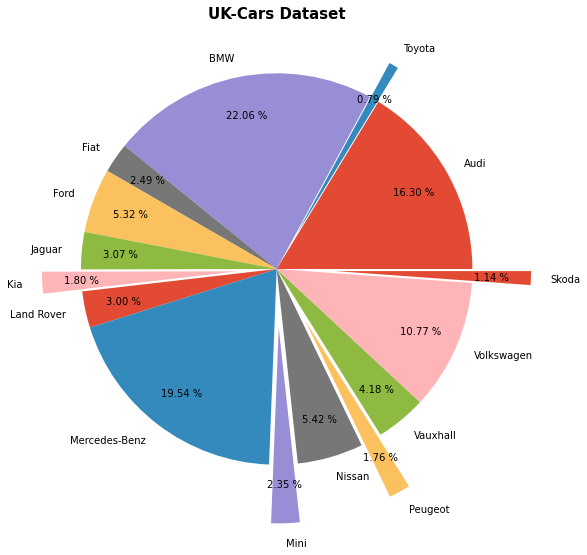

In [125]:
weights = [len(audi.values), len(toyota.values), len(bmw.values), len(fiat.values), len(ford.values), len(jaguar.values), 
          len(kia.values), len(land_rover.values), len(mercedes_benz.values), len(mini.values), len(nissan.values),
           len(peugeot.values), len(vauxhall.values), len(volkswagen.values), len(skoda.values)]
labels = ['Audi', 'Toyota', 'BMW', 'Fiat', 'Ford', 'Jaguar', 'Kia', 'Land Rover', 'Mercedes-Benz', 'Mini',
           'Nissan', 'Peugeot', 'Vauxhall', 'Volkswagen', 'Skoda']
exploding = [0,.2,0,0,0,0,.2,0,0,.3,0,.3,0,0,.3]


plt.figure(figsize=(12,9))
plt.style.use('ggplot')
plt.title('UK-Cars Dataset', fontdict={'fontweight':'bold', 'fontsize':15})
plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=exploding)

plt.show()

### 3.1. Chart of distribution the number of cars over years

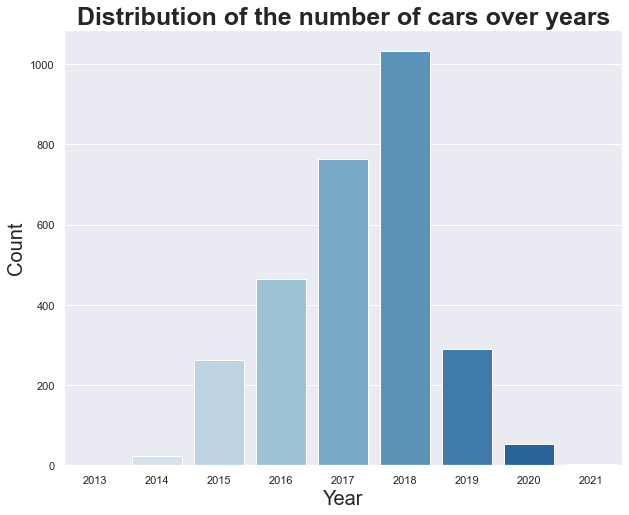

In [126]:
plt.figure(figsize=(10,8))
sb.set_theme(style='darkgrid')
ax = sb.countplot(x='Year', data=dataset, palette='Blues')
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution of the number of cars over years', fontsize=25, weight='bold')
plt.savefig('chart/year.png', dpi=150)
plt.show()

### 3.2. Chart of distribution the number of cars correspond to Fuel Type

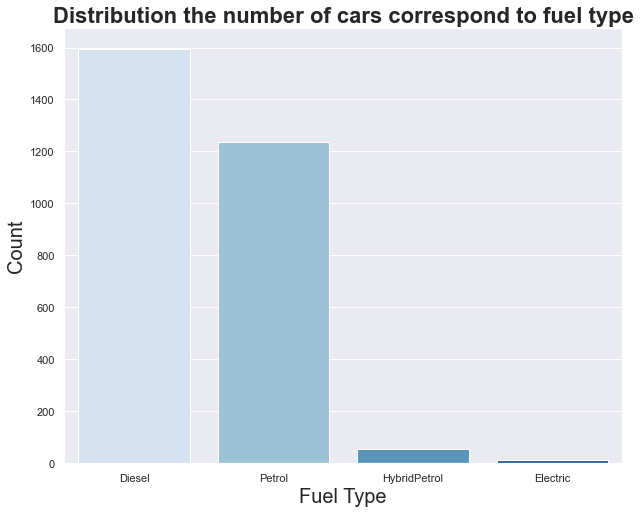

In [127]:
plt.figure(figsize=(10,8))
sb.set_theme(style='darkgrid')
ax = sb.countplot(x='Fuel Type', data=dataset, palette='Blues')
ax.set_xlabel('Fuel Type', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution the number of cars correspond to fuel type', fontsize=22, weight='bold')
plt.savefig('chart/fuel.png', dpi=150)
plt.show()

### 3.3. Chart of distribution the number of cars correspond to Transmission

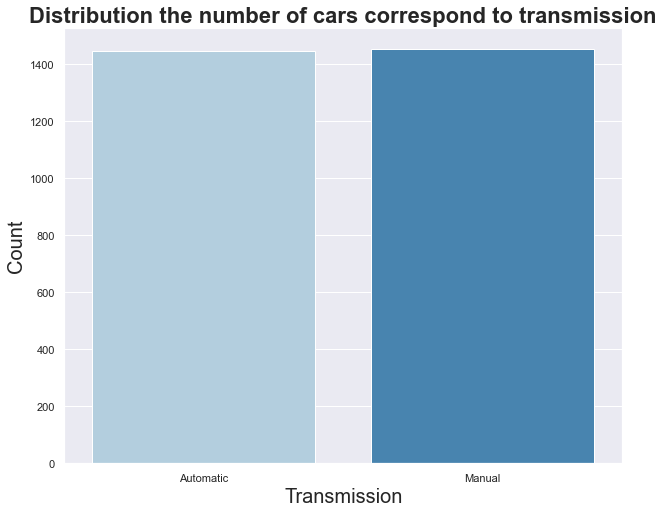

In [128]:
plt.figure(figsize=(10,8))
sb.set_theme(style='darkgrid')
ax = sb.countplot(x='Transmission', data=dataset, palette='Blues')
ax.set_xlabel('Transmission', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution the number of cars correspond to transmission', fontsize=22, weight='bold')
plt.savefig('chart/trans.png', dpi=150)
plt.show()

### 3.4. Chart of distribution the number of cars correspond to Doors

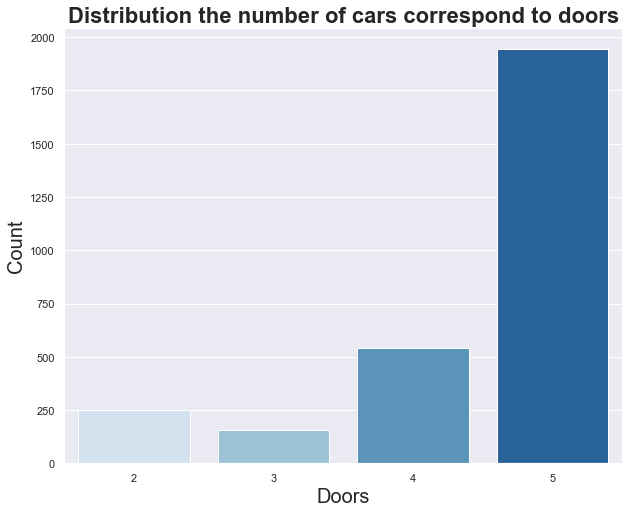

In [129]:
plt.figure(figsize=(10,8))
sb.set_theme(style='darkgrid')
ax = sb.countplot(x='Doors', data=dataset, palette='Blues')
ax.set_xlabel('Doors', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution the number of cars correspond to doors', fontsize=22, weight='bold')
plt.savefig('chart/door.png', dpi=150)
plt.show()

### 3.5. Chart of distribution the number of cars correspond to Engine Size

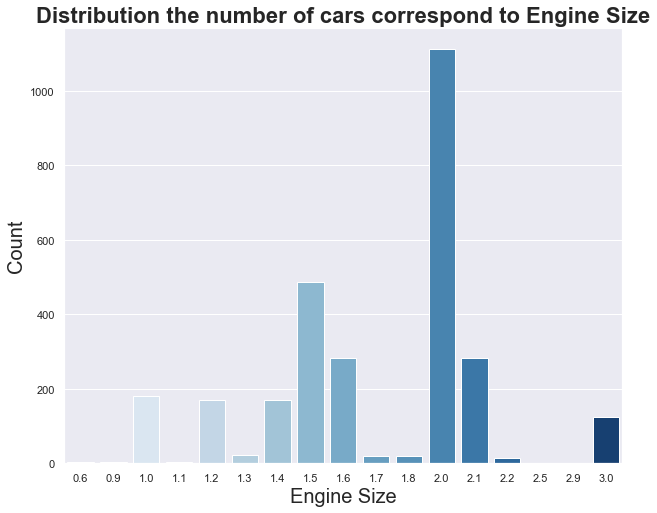

In [130]:
plt.figure(figsize=(10,8))
sb.set_theme(style='darkgrid')
ax = sb.countplot(x='Engine Size', data=dataset, palette='Blues')
ax.set_xlabel('Engine Size', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution the number of cars correspond to Engine Size', fontsize=22, weight='bold')
plt.savefig('chart/engine.png', dpi=150)
plt.show()

### 3.6. Chart of distribution the number of cars correspond to Body Type

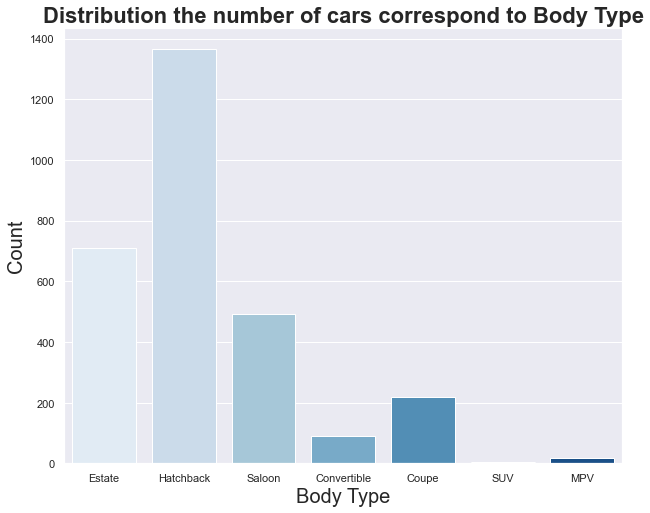

In [131]:
plt.figure(figsize=(10,8))
sb.set_theme(style='darkgrid')
ax = sb.countplot(x='Body Type', data=dataset, palette='Blues')
ax.set_xlabel('Body Type', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distribution the number of cars correspond to Body Type', fontsize=22, weight='bold')
plt.savefig('chart/body.png', dpi=150)
plt.show()

### 3.7. Distribution of Mileage

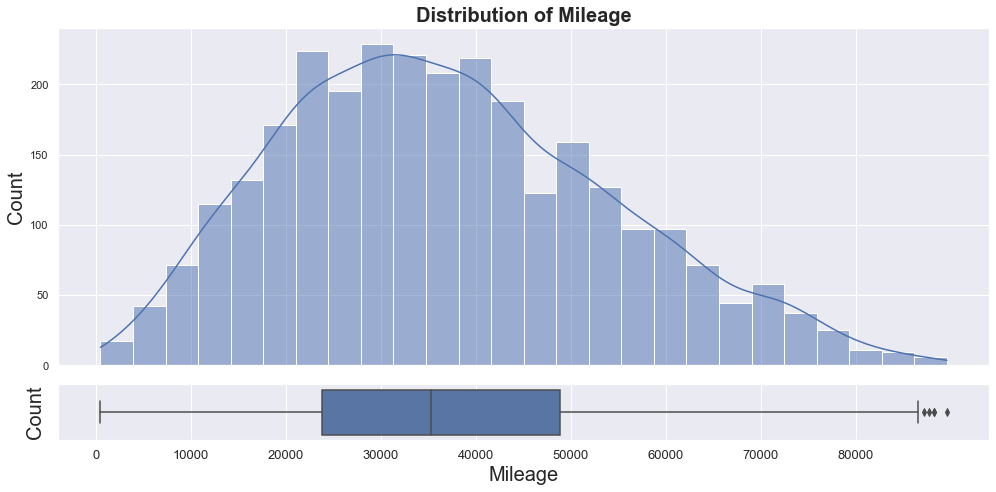

In [132]:
fig,ax = plt.subplots(nrows=2, ncols=1,sharex=True,gridspec_kw={"height_ratios": (0.60, 0.10)}, 
                      figsize=(14,7))
sb.set_theme(style="darkgrid")

ax[0]=sb.histplot(data=dataset, x='Mileage', ax=ax[0],kde=True)
ax[0].set_ylabel('Count', fontsize=20)
ax[0].set_title('Distribution of Mileage',fontsize=20, weight='bold')
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
ax[1]=sb.boxplot(data=dataset, x='Mileage',ax=ax[1])
ax[1].set_xlabel('Mileage',fontsize=20)
ax[1].set_ylabel('Count', fontsize=20)
plt.xticks(range(0,80001,10000),fontsize =13)
plt.yticks(fontsize =13)
plt.tight_layout()
plt.savefig('chart/mileage.png', dpi=150)
plt.show()

### 3.8. Distribution of BHP

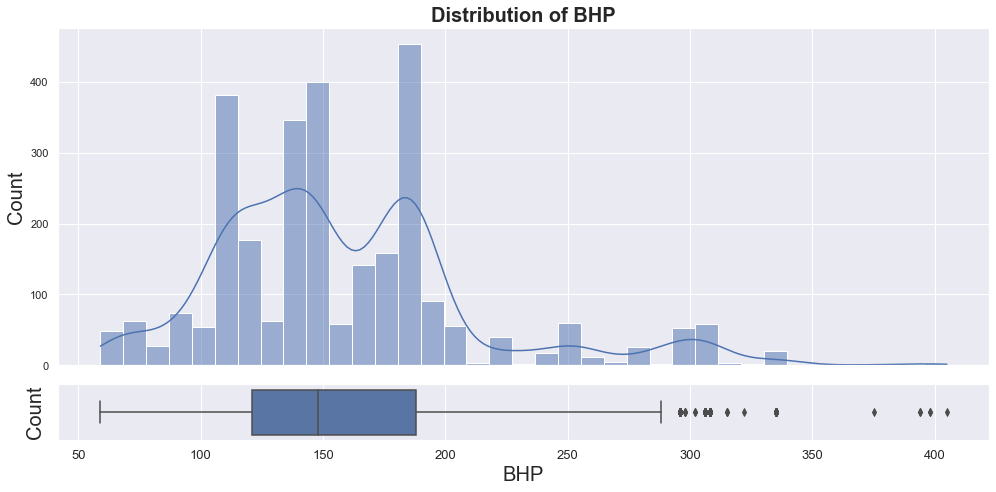

In [133]:
fig,ax = plt.subplots(nrows=2, ncols=1,sharex=True,gridspec_kw={"height_ratios": (0.60, 0.10)}, 
                      figsize=(14,7))
sb.set_theme(style="darkgrid")

ax[0]=sb.histplot(data=dataset, x='BHP', ax=ax[0],kde=True)
ax[0].set_ylabel('Count', fontsize=20)
ax[0].set_title('Distribution of BHP',fontsize=20, weight='bold')
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
ax[1]=sb.boxplot(data=dataset, x='BHP',ax=ax[1])
ax[1].set_xlabel('BHP',fontsize=20)
ax[1].set_ylabel('Count', fontsize=20)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.tight_layout()
plt.savefig('chart/bhp.png', dpi=150)
plt.show()

### 3.9. Distribution of CO2

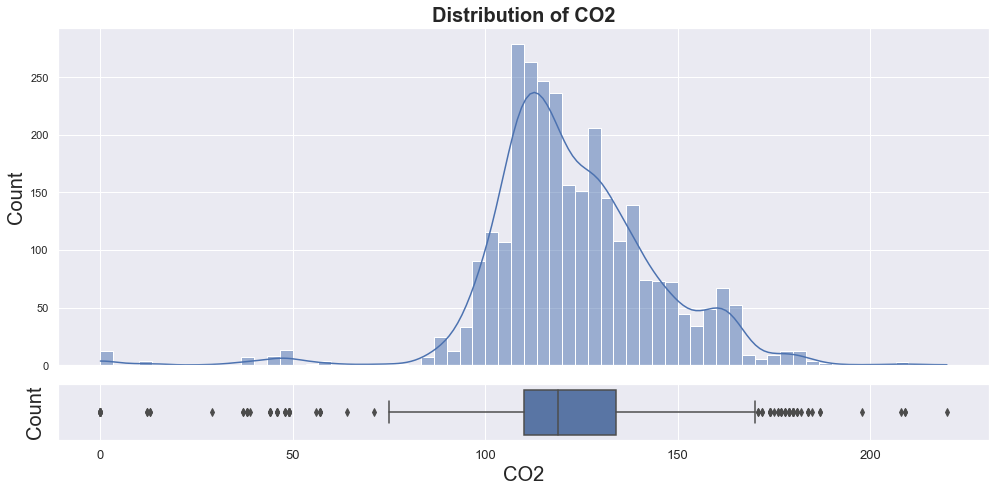

In [134]:
fig,ax = plt.subplots(nrows=2, ncols=1,sharex=True,gridspec_kw={"height_ratios": (0.60, 0.10)}, 
                      figsize=(14,7))
sb.set_theme(style="darkgrid")

ax[0]=sb.histplot(data=dataset, x='CO2', ax=ax[0],kde=True)
ax[0].set_ylabel('Count', fontsize=20)
ax[0].set_title('Distribution of CO2',fontsize=20, weight='bold')
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
ax[1]=sb.boxplot(data=dataset, x='CO2',ax=ax[1])
ax[1].set_xlabel('CO2',fontsize=20)
ax[1].set_ylabel('Count', fontsize=20)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.tight_layout()
plt.savefig('chart/co2.png', dpi=150)
plt.show()

### 3.10. Distribution of Price

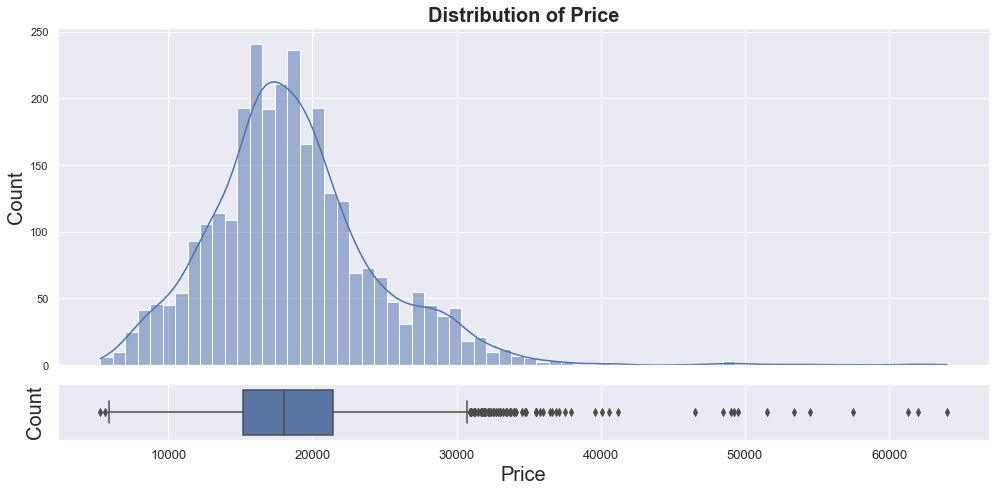

In [135]:
fig,ax = plt.subplots(nrows=2, ncols=1,sharex=True,gridspec_kw={"height_ratios": (0.60, 0.10)}, 
                      figsize=(14,7))
sb.set_theme(style="darkgrid")

ax[0]=sb.histplot(data=dataset, x='Price', ax=ax[0],kde=True)
ax[0].set_ylabel('Count', fontsize=20)
ax[0].set_title('Distribution of Price',fontsize=20, weight='bold')
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
ax[1]=sb.boxplot(data=dataset, x='Price',ax=ax[1])
ax[1].set_xlabel('Price',fontsize=20)
ax[1].set_ylabel('Count', fontsize=20)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.tight_layout()
plt.savefig('chart/price.png', dpi=150)
plt.show()

### 3.11. Car Price by Engine Size over Years

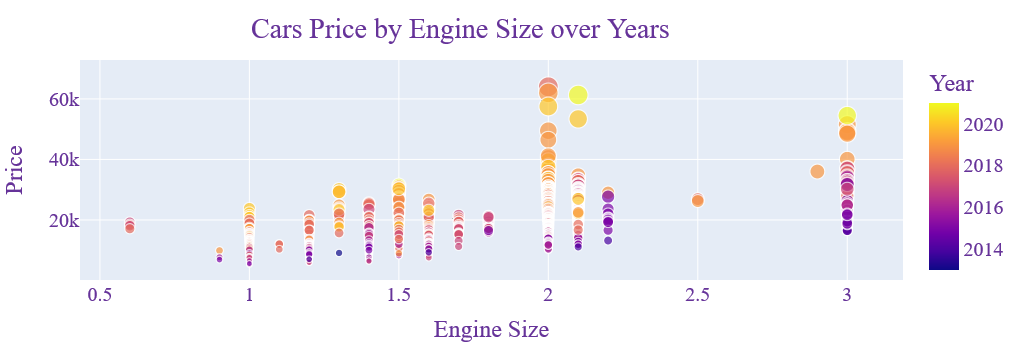

In [136]:
fig = px.scatter(dataset, x="Engine Size", y="Price", color="Year", size="Price", 
                   labels={"Price": "Price", "Engine Size": "Engine Size"})
fig.update_layout(
    title={
        'text': "Cars Price by Engine Size over Years",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Sans serif monospaced",
        size=20,
        color="RebeccaPurple"))
fig.write_image("chart/311.png")
fig.show()

### 3.12. Cars Mileages by Engine Size

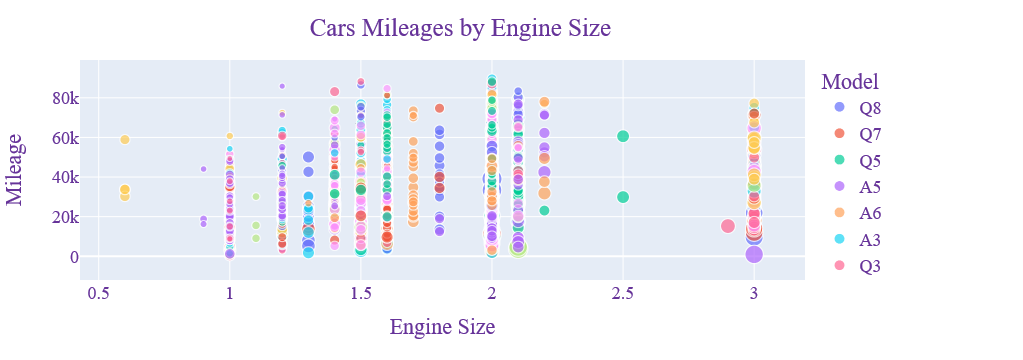

In [137]:
fig = px.scatter(dataset, x="Engine Size", y="Mileage", color="Model", size="Price", 
                   labels={"Engine Size": "Engine Size", "Mileage": "Mileage"})
fig.update_layout(
    title={
        'text': "Cars Mileages by Engine Size",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Sans serif monospaced",
        size=18,
        color="RebeccaPurple"))
fig.write_image("chart/312.png")
fig.show()

### 3.13. Cars Mileage by Fuel Type based on Transmission

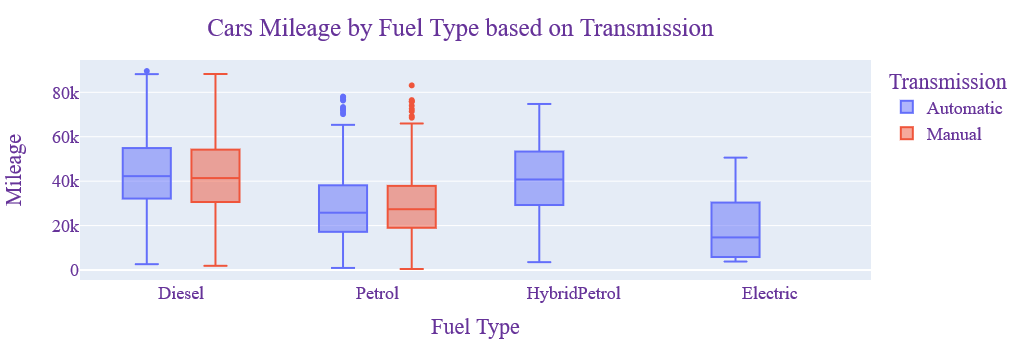

In [138]:
fig = px.box(dataset, x="Fuel Type", y="Mileage", color="Transmission",  
                   labels={"Mileage": "Mileage", "Fuel Type": "Fuel Type"})
fig.update_layout(
    title={
        'text': "Cars Mileage by Fuel Type based on Transmission",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Sans serif monospaced",
        size=18,
        color="RebeccaPurple"))
fig.write_image("chart/313.png")
fig.show()

### 3.14. Cars Prices based on Transmission by Fuel Type

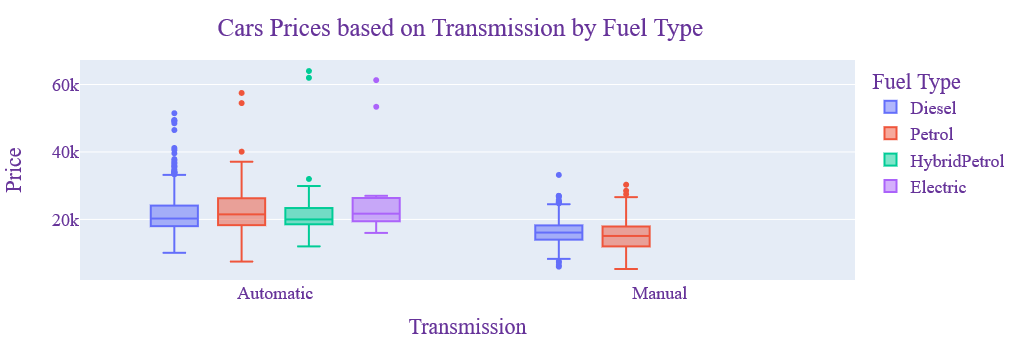

In [139]:
fig = px.box(dataset, x="Transmission", y="Price", color='Fuel Type',
                 labels={"Transmission":"Transmission", "Price": "Price"} 
                )
fig.update_layout(
    title={
        'text': "Cars Prices based on Transmission by Fuel Type",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Sans serif monospaced",
        size=18,
        color="RebeccaPurple"))
fig.write_image("chart/314.png")
fig.show()

### 3.15. Cars CO2 by Fuel Type and Engine Size

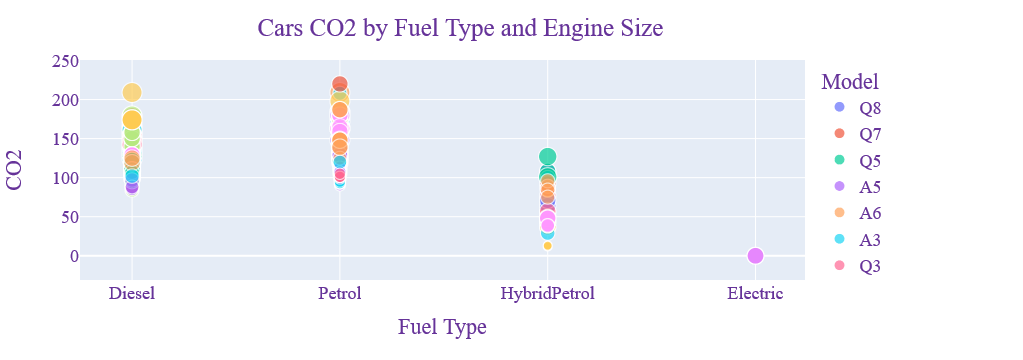

In [140]:
fig = px.scatter(dataset, x="Fuel Type", y="CO2", color="Model", size="Engine Size", 
                   labels={"Fuel Type": "Fuel Type", "CO2": "CO2"})
fig.update_layout(
    title={
        'text': "Cars CO2 by Fuel Type and Engine Size",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Sans serif monospaced",
        size=18,
        color="RebeccaPurple"))
fig.write_image("chart/315.png")
fig.show()

### 3.16. Cars Prices based on Mileages by Transmission

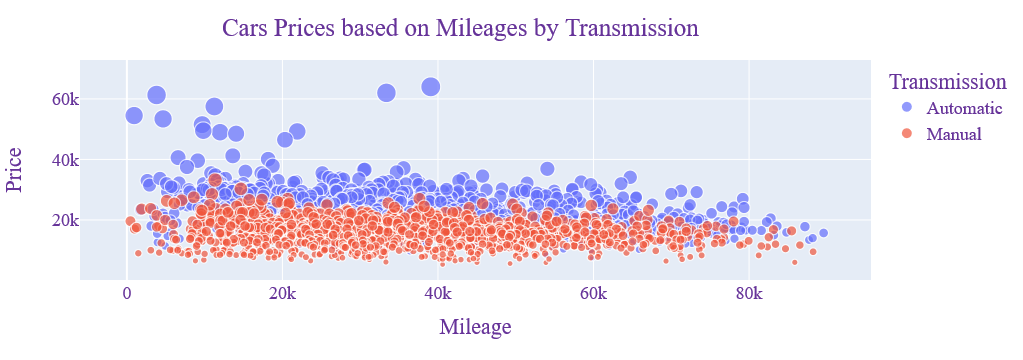

In [141]:
fig = px.scatter(dataset, x="Mileage", y="Price", color='Transmission',size="Price",
                 labels={"Mileage":"Mileage", "Price": "Price"} # customize axis label
                )
fig.update_layout(
    title={
        'text': "Cars Prices based on Mileages by Transmission",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Sans serif monospaced",
        size=18,
        color="RebeccaPurple"))
fig.write_image("chart/316.png")
fig.show()

### 3.17. Tree Map

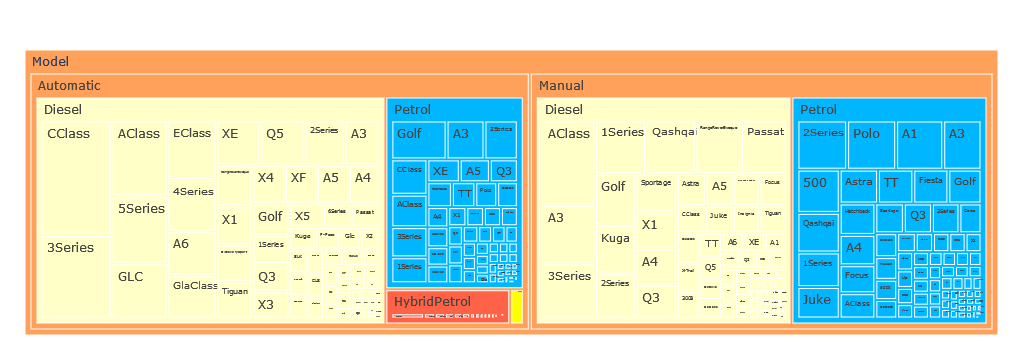

In [142]:
fig = px.treemap(dataset, path=[px.Constant("Model"), 'Transmission', 'Fuel Type', 'Model'], 
                 values='Mileage', color='Fuel Type',
                color_discrete_map={'Diesel':'#ffffc7', 'Petrol':'#00b7ff', 'HybridPetrol':'tomato', 'Electric':'yellow'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.write_image("chart/317.png")
fig.show()

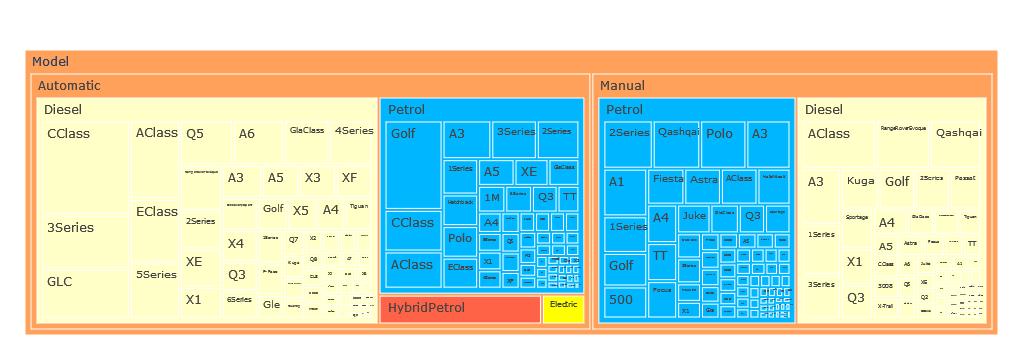

In [143]:
fig = px.treemap(dataset, path=[px.Constant("Model"), 'Transmission', 'Fuel Type', 'Model'], 
                 values='Price', color='Fuel Type',
                  color_discrete_map={'Diesel':'#ffffc7', 'Petrol':'#00b7ff', 'HybridPetrol':'tomato', 'Electric':'yellow'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.write_image("chart/318.png")
fig.show()

## 4. Data Modeling

### 4.1. Random Forest Regression

In [144]:
dataset.head()

Model Fuel Type  Engine Size Transmission  Mileage  Doors  BHP  Year   MPG  \
0    Q8    Diesel          3.0    Automatic     9680      5  282  2019  33.6   
1    Q8    Diesel          3.0    Automatic    21906      5  282  2019  33.6   
2    Q7    Diesel          3.0    Automatic    11982      5  282  2019  33.2   
3    Q7    Diesel          3.0    Automatic    14045      5  282  2019  33.2   
4    Q5    Petrol          2.0    Automatic    25232      5  248  2018  40.4   

  Body Type  CO2               Colour  Price  
0    Estate  178                BLACK  51500  
1    Estate  178                 BLUE  49250  
2    Estate  177  Samuraigreymetallic  49000  
3    Estate  177          DAYTONAGREY  48500  
4    Estate  159         GLACIERWHITE  34000

In [271]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [153]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [154]:
dataset=MultiColumnLabelEncoder(columns = ['Model','Fuel Type','Transmission','Body Type', 'Colour']).fit_transform(dataset)

In [155]:
dataset.head()

Model  Fuel Type  Engine Size  Transmission  Mileage  Doors  BHP  Year  \
0     93          0          3.0             0     9680      5  282  2019   
1     93          0          3.0             0    21906      5  282  2019   
2     92          0          3.0             0    11982      5  282  2019   
3     92          0          3.0             0    14045      5  282  2019   
4     91          3          2.0             0    25232      5  248  2018   

    MPG  Body Type  CO2  Colour  Price  
0  33.6          2  178      10  51500  
1  33.6          2  178      12  49250  
2  33.2          2  177     151  49000  
3  33.2          2  177      46  48500  
4  40.4          2  159      69  34000

In [294]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [301]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle =True)

In [297]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train: (2316, 12)
X_test: (580, 12)
y_train: (2316,)
y_test : (580,)


In [204]:
model=RandomForestRegressor(random_state=42)

In [304]:
param_grid = { 
    'n_estimators': [42, 96, 147, 194, 245, 282, 300],
    'max_depth' : [12, 15, 18, 21, 26, 27],
}

In [220]:
gs = GridSearchCV(estimator=model, param_grid=param_grid, verbose=3, cv=5, return_train_score=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END max_depth=12, n_estimators=42;, score=(train=0.953, test=0.767) total time=   0.1s
[CV 2/5] END max_depth=12, n_estimators=42;, score=(train=0.953, test=0.845) total time=   0.1s
[CV 3/5] END max_depth=12, n_estimators=42;, score=(train=0.956, test=0.827) total time=   0.1s
[CV 4/5] END max_depth=12, n_estimators=42;, score=(train=0.956, test=0.821) total time=   0.1s
[CV 5/5] END max_depth=12, n_estimators=42;, score=(train=0.957, test=0.797) total time=   0.1s
[CV 1/5] END max_depth=12, n_estimators=96;, score=(train=0.957, test=0.777) total time=   0.3s
[CV 2/5] END max_depth=12, n_estimators=96;, score=(train=0.956, test=0.848) total time=   0.3s
[CV 3/5] END max_depth=12, n_estimators=96;, score=(train=0.959, test=0.833) total time=   0.3s
[CV 4/5] END max_depth=12, n_estimators=96;, score=(train=0.958, test=0.822) total time=   0.3s
[CV 5/5] END max_depth=12, n_estimators=96;, score=(train=0.958, test=0.78

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [12, 15, 18, 21, 26, 27],
                         'n_estimators': [42, 96, 147, 194, 245, 282, 300]},
             return_train_score=True, verbose=3)

In [221]:
gs.best_estimator_

RandomForestRegressor(max_depth=18, n_estimators=96, random_state=42)

In [222]:
print(f'Random Forest Regressor Test Score is : {gs.score(X_train, y_train)*100:.2f}')
print(f'Random Forest Regressor Test Score is : {gs.score(X_test, y_test)*100:.2f}')

Random Forest Regressor Test Score is : 97.06
Random Forest Regressor Test Score is : 84.29


In [223]:
evaluation = pd.concat([pd.DataFrame(gs.cv_results_["params"]),
                        pd.DataFrame(gs.cv_results_["mean_train_score"], columns=["train"]),
                        pd.DataFrame(gs.cv_results_["mean_test_score"], columns=["val"])],axis=1)

In [224]:
evaluation.to_csv('eval/random_forest_eval.csv',index=False)

In [226]:
evaluation.head()

max_depth  n_estimators     train       val
0         12            42  0.955008  0.811378
1         12            96  0.957435  0.812884
2         12           147  0.957806  0.811135
3         12           194  0.958113  0.810056
4         12           245  0.958099  0.810570

C:\Users\PC\AppData\Local\Temp/ipykernel_9700/2209651872.py:9: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



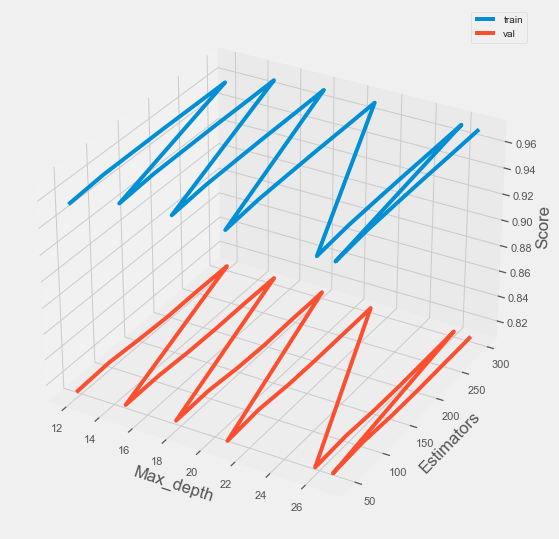

In [247]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(12,9))
plt.style.use('fivethirtyeight')
ax = fig.gca(projection='3d')
ax.plot(evaluation['max_depth'], evaluation['n_estimators'], evaluation['train'], label='train')
ax.plot(evaluation['max_depth'], evaluation['n_estimators'], evaluation['val'], label='val')
ax.set_xlabel('Max_depth')
ax.set_ylabel('Estimators')
ax.set_zlabel('Score')
ax.legend()

plt.show()

### 4.2. KNN Regression

In [272]:
from sklearn.neighbors import KNeighborsRegressor

In [291]:
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 6, weights='distance')    
KNeighborsRegressorModel.fit(X_train, y_train)

print('KNeighborsRegressorModel Train Score is : %.2f' %(KNeighborsRegressorModel.score(X_train, y_train)*100))
print('KNeighborsRegressorModel Test Score is : %.2f' %(KNeighborsRegressorModel.score(X_test, y_test)*100))

KNeighborsRegressorModel Train Score is : 100.00
KNeighborsRegressorModel Test Score is : 74.50


## 5. Hypothesis Testing

In [257]:
X = dataset.drop(['Price','Mileage'], axis=1)
y = dataset['Price']

In [259]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle =True)

In [261]:
model=RandomForestRegressor(random_state=42)

In [262]:
param_grid = { 
    'n_estimators': [42, 96, 147, 194, 245, 282, 300],
    'max_depth' : [12, 15, 18, 21, 26, 27],
}

In [263]:
gs = GridSearchCV(estimator=model, param_grid=param_grid, verbose=3, cv=5, return_train_score=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END max_depth=12, n_estimators=42;, score=(train=0.953, test=0.767) total time=   0.1s
[CV 2/5] END max_depth=12, n_estimators=42;, score=(train=0.953, test=0.845) total time=   0.1s
[CV 3/5] END max_depth=12, n_estimators=42;, score=(train=0.956, test=0.827) total time=   0.1s
[CV 4/5] END max_depth=12, n_estimators=42;, score=(train=0.956, test=0.821) total time=   0.1s
[CV 5/5] END max_depth=12, n_estimators=42;, score=(train=0.957, test=0.797) total time=   0.1s
[CV 1/5] END max_depth=12, n_estimators=96;, score=(train=0.957, test=0.777) total time=   0.3s
[CV 2/5] END max_depth=12, n_estimators=96;, score=(train=0.956, test=0.848) total time=   0.3s
[CV 3/5] END max_depth=12, n_estimators=96;, score=(train=0.959, test=0.833) total time=   0.3s
[CV 4/5] END max_depth=12, n_estimators=96;, score=(train=0.958, test=0.822) total time=   0.3s
[CV 5/5] END max_depth=12, n_estimators=96;, score=(train=0.958, test=0.78

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [12, 15, 18, 21, 26, 27],
                         'n_estimators': [42, 96, 147, 194, 245, 282, 300]},
             return_train_score=True, verbose=3)

In [264]:
gs.best_estimator_

RandomForestRegressor(max_depth=18, n_estimators=96, random_state=42)

In [265]:
print(f'Random Forest Regressor Test Score is : {gs.score(X_train, y_train)*100:.2f}')
print(f'Random Forest Regressor Test Score is : {gs.score(X_test, y_test)*100:.2f}')

Random Forest Regressor Test Score is : 97.06
Random Forest Regressor Test Score is : 84.29


In [266]:
evaluation_hypo = pd.concat([pd.DataFrame(gs.cv_results_["params"]),
                        pd.DataFrame(gs.cv_results_["mean_train_score"], columns=["train"]),
                        pd.DataFrame(gs.cv_results_["mean_test_score"], columns=["val"])],axis=1)

In [267]:
evaluation_hypo.to_csv('eval/hypo.csv',index=False)